In [5]:
import shutil
from google.colab import files

# Create a ZIP archive of the WORKSPACE folder
shutil.make_archive('WORKSPACE', 'zip', '/content/WORKSPACE')

# Download the ZIP file
files.download('WORKSPACE.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
!mkdir -p /content/WORKSPACE
!cp -r /content/drive/MyDrive/DATASET /content/WORKSPACE/

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
!ls /content/drive/MyDrive/DATASET

fake_cifake_images	real_cifake_images	test
fake_cifake_preds.json	real_cifake_preds.json


In [7]:
# === Phase 0 (fixed version): Mount Drive, verify dataset, create workspace ===

import os, glob, shutil
from pathlib import Path

# 1️⃣ Reset any old mounts (prevents read-only errors)
try:
    from google.colab import drive
    drive.flush_and_unmount()
    print("Previous Drive unmounted (if any).")
except Exception as e:
    print("No previous mount or already unmounted:", e)

# 2️⃣ Mount Drive with write permissions
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("✅ Google Drive mounted successfully (writable).")

# 3️⃣ Define dataset path (matches your screenshot)
BASE = "/content/drive/MyDrive/DATASET"
print(f"\n📁 Dataset base path set to:\n{BASE}")

# 4️⃣ Check dataset contents
expected = [
    "fake_cifake_images",
    "real_cifake_images",
    "test",
    "fake_cifake_preds.json",
    "real_cifake_preds.json"
]
print("\n🔍 Checking files/folders:")
for name in expected:
    path = os.path.join(BASE, name)
    print(f" - {name:25s} | {'✅ Found' if os.path.exists(path) else '❌ Missing'}")

# 5️⃣ Create writable workspace INSIDE Colab (/content) to avoid Drive read-only issues
WORK_DIR = "/content/WORKSPACE"
subfolders = ["models", "features", "outputs", "reports", "logs"]
for sub in subfolders:
    os.makedirs(os.path.join(WORK_DIR, sub), exist_ok=True)
print("\n📦 Writable workspace created at:", WORK_DIR)
for sub in subfolders:
    print("  └──", sub)

# 6️⃣ Verify image counts (sanity check)
def count_images(folder):
    exts = ("*.jpg","*.jpeg","*.png","*.bmp","*.tiff","*.webp")
    files = []
    for e in exts:
        files += glob.glob(os.path.join(folder, e))
    return len(files)

fake_dir = os.path.join(BASE, "fake_cifake_images")
real_dir = os.path.join(BASE, "real_cifake_images")
test_dir = os.path.join(BASE, "test")

print("\n🖼️ Image counts:")
print(" Fake :", count_images(fake_dir))
print(" Real :", count_images(real_dir))
print(" Test :", count_images(test_dir))

# 7️⃣ Verify JSON file sizes and first few characters
for js in ["fake_cifake_preds.json","real_cifake_preds.json"]:
    path = os.path.join(BASE, js)
    if os.path.exists(path):
        size = os.path.getsize(path)/1e6
        with open(path,"r",encoding="utf-8") as f:
            snippet = f.read(200)
        print(f"\n📄 {js} ({size:.2f} MB):\n {snippet[:180]} ...")
    else:
        print(f"\n⚠️ Missing JSON: {js}")

print("\n✅ Phase 0 complete → Drive mounted (writable) + dataset verified + local workspace ready.")


Previous Drive unmounted (if any).
Mounted at /content/drive
✅ Google Drive mounted successfully (writable).

📁 Dataset base path set to:
/content/drive/MyDrive/DATASET

🔍 Checking files/folders:
 - fake_cifake_images        | ✅ Found
 - real_cifake_images        | ✅ Found
 - test                      | ✅ Found
 - fake_cifake_preds.json    | ✅ Found
 - real_cifake_preds.json    | ✅ Found

📦 Writable workspace created at: /content/WORKSPACE
  └── models
  └── features
  └── outputs
  └── reports
  └── logs

🖼️ Image counts:
 Fake : 1000
 Real : 1000
 Test : 500

📄 fake_cifake_preds.json (0.06 MB):
 [
    {
        "index": 1,
        "prediction": "fake"
    },
    {
        "index": 2,
        "prediction": "fake"
    },
    {
        "index": 3,
        "prediction": "fake" ...

📄 real_cifake_preds.json (0.06 MB):
 [
    {
        "index": 1,
        "prediction": "real"
    },
    {
        "index": 2,
        "prediction": "fake"
    },
    {
        "index": 3,
        "prediction"

Found images -> fake: 1000, real: 1000, test: 500
JSON mappings sizes -> fake_json_map: 1000, real_json_map: 1000

Dataframe built. Sample rows:


,image_path,basename,folder_label,json_label
1860,/content/drive/MyDrive/DATASET/real_cifake_ima...,873.png,real,real
353,/content/drive/MyDrive/DATASET/fake_cifake_ima...,416.png,fake,fake
1333,/content/drive/MyDrive/DATASET/real_cifake_ima...,399.png,real,real
905,/content/drive/MyDrive/DATASET/fake_cifake_ima...,913.png,fake,fake
1289,/content/drive/MyDrive/DATASET/real_cifake_ima...,359.png,real,real
1273,/content/drive/MyDrive/DATASET/real_cifake_ima...,344.png,real,real
938,/content/drive/MyDrive/DATASET/fake_cifake_ima...,943.png,fake,fake
1731,/content/drive/MyDrive/DATASET/real_cifake_ima...,757.png,real,real



Class distribution (folder_label):
folder_label
fake    1000
real    1000
Name: count, dtype: int64

How many rows have JSON label present?
2000 out of 2000

Number of mismatches (folder_label != json_label): 36
Showing up to 10 mismatches:


,image_path,basename,folder_label,json_label
32,/content/drive/MyDrive/DATASET/fake_cifake_ima...,127.png,fake,real
65,/content/drive/MyDrive/DATASET/fake_cifake_ima...,157.png,fake,real
84,/content/drive/MyDrive/DATASET/fake_cifake_ima...,174.png,fake,real
195,/content/drive/MyDrive/DATASET/fake_cifake_ima...,274.png,fake,real
218,/content/drive/MyDrive/DATASET/fake_cifake_ima...,295.png,fake,real
230,/content/drive/MyDrive/DATASET/fake_cifake_ima...,305.png,fake,real
240,/content/drive/MyDrive/DATASET/fake_cifake_ima...,314.png,fake,real
539,/content/drive/MyDrive/DATASET/fake_cifake_ima...,584.png,fake,real
607,/content/drive/MyDrive/DATASET/fake_cifake_ima...,645.png,fake,real
686,/content/drive/MyDrive/DATASET/fake_cifake_ima...,716.png,fake,real



Number of basenames that are non-numeric pattern (e.g., not '123.png'): 0

Showing sample FAKE images:


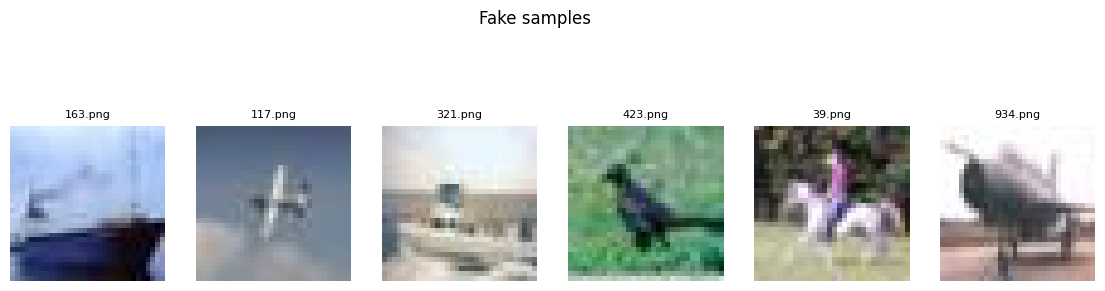


Showing sample REAL images:


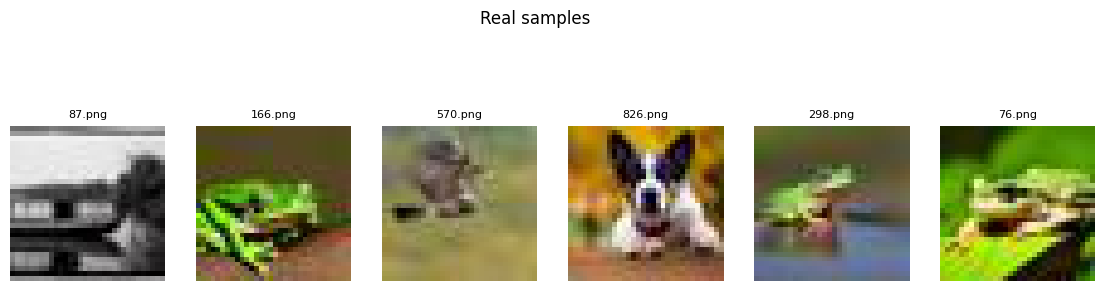


Showing sample TEST images:


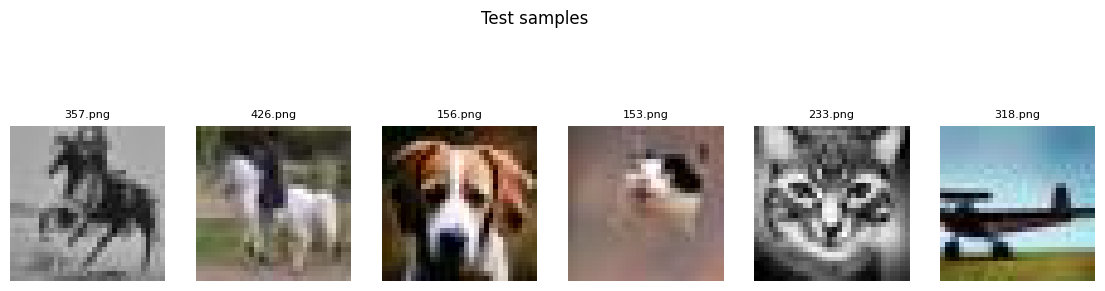


Saved dataset table to: /content/WORKSPACE/features/df_image_table.csv

--- DONE: Please paste back these outputs ---
1) class counts above
2) number of rows with JSON label present
3) number of mismatches (folder vs json) and sample rows printed above (if any)


In [8]:
# Phase 1: Data understanding & dataset table (Colab cell)
import os, json, random, glob
from pathlib import Path
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Paths (should match Phase 0)
BASE = "/content/drive/MyDrive/DATASET"
WORK_DIR = "/content/WORKSPACE"
FEATURES_DIR = os.path.join(WORK_DIR, "features")
os.makedirs(FEATURES_DIR, exist_ok=True)

fake_dir = os.path.join(BASE, "fake_cifake_images")
real_dir = os.path.join(BASE, "real_cifake_images")
test_dir = os.path.join(BASE, "test")
fake_json_path = os.path.join(BASE, "fake_cifake_preds.json")
real_json_path = os.path.join(BASE, "real_cifake_preds.json")

# Utility: list images
def list_images(folder):
    exts = ("*.png","*.jpg","*.jpeg","*.bmp","*.tiff","*.webp")
    files = []
    for e in exts:
        files += glob.glob(os.path.join(folder, e))
    return sorted(files)

fake_files = list_images(fake_dir)
real_files = list_images(real_dir)
test_files = list_images(test_dir)

print(f"Found images -> fake: {len(fake_files)}, real: {len(real_files)}, test: {len(test_files)}")

# Load JSON lists and convert to index->prediction mapping
def json_list_to_map(json_path):
    if not os.path.exists(json_path):
        return {}
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    # data is a list of dicts like {"index": 1, "prediction": "fake"}
    mapping = {}
    for item in data:
        # accept int or string index
        idx = item.get("index")
        pred = item.get("prediction")
        if idx is None:
            continue
        # convert index to string basename assuming files are like "1.png", "2.png", ...
        basename = f"{idx}.png"
        mapping[basename] = pred
    return mapping

fake_json_map = json_list_to_map(fake_json_path)
real_json_map = json_list_to_map(real_json_path)

print(f"JSON mappings sizes -> fake_json_map: {len(fake_json_map)}, real_json_map: {len(real_json_map)}")

# Build DataFrame for train images
rows = []
for p in fake_files:
    b = Path(p).name
    # folder label = 1 for fake, 0 for real
    rows.append({
        "image_path": p,
        "basename": b,
        "folder_label": "fake",
        "json_label": fake_json_map.get(b, None) or real_json_map.get(b, None)
    })
for p in real_files:
    b = Path(p).name
    rows.append({
        "image_path": p,
        "basename": b,
        "folder_label": "real",
        "json_label": real_json_map.get(b, None) or fake_json_map.get(b, None)
    })

df = pd.DataFrame(rows)
print("\nDataframe built. Sample rows:")
display(df.sample(8, random_state=42))

# Basic checks
print("\nClass distribution (folder_label):")
print(df.folder_label.value_counts())

print("\nHow many rows have JSON label present?")
print(df.json_label.notna().sum(), "out of", len(df))

# Find mismatches where folder label != JSON label (possible label disagreements)
mismatches = df[(df.json_label.notna()) & (df.json_label != df.folder_label)]
print("\nNumber of mismatches (folder_label != json_label):", len(mismatches))
if len(mismatches) > 0:
    print("Showing up to 10 mismatches:")
    display(mismatches.head(10))

# Show if any training basenames are missing expected numeric pattern (not like '1.png')
def basename_is_numeric(b):
    return Path(b).stem.isdigit()

non_numeric = [b for b in df.basename.unique() if not basename_is_numeric(b)]
print("\nNumber of basenames that are non-numeric pattern (e.g., not '123.png'):", len(non_numeric))
if len(non_numeric) > 0:
    print("Examples:", non_numeric[:10])

# Display small sample images: 6 fake, 6 real, 6 test
def show_grid(paths, title=None, cols=6, figsize=(14,4)):
    if not paths:
        return
    rows = (len(paths) + cols - 1)//cols
    plt.figure(figsize=figsize)
    for i,p in enumerate(paths[:cols*rows]):
        try:
            img = Image.open(p).convert("RGB")
            plt.subplot(rows, cols, i+1)
            plt.imshow(img, interpolation='nearest')
            plt.axis("off")
            plt.title(Path(p).name, fontsize=8)
        except Exception as e:
            print("Error loading", p, e)
    if title:
        plt.suptitle(title)
    plt.show()

print("\nShowing sample FAKE images:")
show_grid(random.sample(fake_files, min(6, len(fake_files))), title="Fake samples")

print("\nShowing sample REAL images:")
show_grid(random.sample(real_files, min(6, len(real_files))), title="Real samples")

print("\nShowing sample TEST images:")
show_grid(random.sample(test_files, min(6, len(test_files))), title="Test samples")

# Save df to CSV inside writable WORKSPACE
out_csv = os.path.join(FEATURES_DIR, "df_image_table.csv")
df.to_csv(out_csv, index=False)
print("\nSaved dataset table to:", out_csv)

# Final notes printed for you to paste back
print("\n--- DONE: Please paste back these outputs ---")
print("1) class counts above")
print("2) number of rows with JSON label present")
print("3) number of mismatches (folder vs json) and sample rows printed above (if any)")


In [9]:
# Phase 2 prep: create stratified train/val split by json_label and prepare tf.data multi-task pipelines
import os, random
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# ---------- Paths (adjust if needed) ----------
BASE = "/content/drive/MyDrive/DATASET"
WORK_DIR = "/content/WORKSPACE"
FEATURES_DIR = os.path.join(WORK_DIR, "features")
os.makedirs(FEATURES_DIR, exist_ok=True)

df_path = os.path.join(FEATURES_DIR, "df_image_table.csv")  # created in Phase1
assert os.path.exists(df_path), f"Data table not found: {df_path}. Run Phase1 first."

df = pd.read_csv(df_path)
print("Loaded dataframe rows:", len(df))

# ---------- Normalize & map labels ----------
# Primary label = json_label (the proprietary model output) -> map to 1 for 'fake', 0 for 'real'
# Auxiliary label = folder_label (ground-truth folder) -> map similarly
def map_label(x):
    if pd.isna(x):
        return -1
    s = str(x).strip().lower()
    if s == "fake": return 1
    if s == "real": return 0
    # fallback if other tokens appear
    return -1

df["primary"] = df["json_label"].apply(map_label)   # main target (mimic)
df["aux"] = df["folder_label"].apply(map_label)     # auxiliary

# Quick check for unmapped labels
print("Primary label value counts:\n", df.primary.value_counts(dropna=False))
print("Aux label value counts:\n", df.aux.value_counts(dropna=False))

# If any primary labels are -1 (unexpected values), raise a warning
if (df["primary"] == -1).any():
    print("WARNING: some primary labels mapped to -1. Inspect df.json_label unique values:")
    print(df["json_label"].unique())

# ---------- Stratified split by primary label ----------
# We will stratify by 'primary'. If primary has only one class (unlikely), fallback to folder_label stratify.
strat_col = "primary"
if df[strat_col].nunique() < 2:
    strat_col = "aux"

train_df, val_df = train_test_split(
    df,
    test_size=0.15,
    stratify=df[strat_col],
    random_state=42,
    shuffle=True
)

print(f"Split sizes -> train: {len(train_df)}, val: {len(val_df)} (stratified by {strat_col})")

# Save CSVs for reproducibility
train_csv = os.path.join(FEATURES_DIR, "train_split.csv")
val_csv = os.path.join(FEATURES_DIR, "val_split.csv")
train_df.to_csv(train_csv, index=False)
val_df.to_csv(val_csv, index=False)
print("Saved train/val CSVs to:", train_csv, val_csv)

# ---------- tf.data pipelines for multi-task training ----------
IMG_SIZE = (32, 32)
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

def decode_and_resize(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.convert_image_dtype(image, tf.float32)  # [0,1]
    image = tf.image.resize(image, IMG_SIZE, method="bilinear")
    return image

def augment(image):
    # Augmentations suitable for small images (32x32)
    image = tf.image.random_flip_left_right(image)
    # small pad + random crop for translation robustness
    pad = 4
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE[0] + pad, IMG_SIZE[1] + pad)
    image = tf.image.random_crop(image, size=[IMG_SIZE[0], IMG_SIZE[1], 3])
    image = tf.image.random_brightness(image, 0.06)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.01)
    image = image + noise
    image = tf.clip_by_value(image, 0.0, 1.0)
    return image

def df_to_dataset(df_input, batch_size=64, training=False, shuffle_buffer=2048):
    paths = df_input["image_path"].astype(str).values
    prim = df_input["primary"].values.astype("int32")
    aux = df_input["aux"].values.astype("int32")
    dataset = tf.data.Dataset.from_tensor_slices((paths, prim, aux))

    def _load(path, primary, aux):
        img = decode_and_resize(path)
        if training:
            img = augment(img)
        # Build label dict for multi-task: {'main': primary, 'aux': aux}
        labels = {"main": tf.cast(primary, tf.float32), "aux": tf.cast(aux, tf.float32)}
        return img, labels

    dataset = dataset.map(lambda p, a, b: _load(p, a, b), num_parallel_calls=AUTOTUNE)
    if training:
        dataset = dataset.shuffle(shuffle_buffer, seed=42)
    dataset = dataset.batch(batch_size).prefetch(AUTOTUNE)
    return dataset

train_ds = df_to_dataset(train_df, batch_size=BATCH_SIZE, training=True)
val_ds = df_to_dataset(val_df, batch_size=BATCH_SIZE, training=False)

# ---------- Simple helper to peek a batch ----------
for batch_images, batch_labels in train_ds.take(1):
    print("Batch images shape:", batch_images.shape)
    print("Batch labels keys:", batch_labels.keys())
    print("Example main labels (first 10):", batch_labels["main"].numpy()[:10])
    print("Example aux labels  (first 10):", batch_labels["aux"].numpy()[:10])
    break

# ---------- Compute optional class weights for primary target ----------
# If class imbalance exists, class weights can help. Here dataset is balanced but compute anyway.
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(train_df["primary"])
if len(classes) > 1:
    cw = compute_class_weight("balanced", classes=classes, y=train_df["primary"].values)
    class_weight_map = {int(c): float(w) for c, w in zip(classes, cw)}
    print("Class weights (primary):", class_weight_map)
else:
    print("Single-class primary target in train set; skipping class weight computation.")

print("\n✅ Phase 2 prep complete: train/val CSVs saved and tf.data pipelines ready for multi-task training.")


Loaded dataframe rows: 2000
Primary label value counts:
 primary
1    1012
0     988
Name: count, dtype: int64
Aux label value counts:
 aux
1    1000
0    1000
Name: count, dtype: int64
Split sizes -> train: 1700, val: 300 (stratified by primary)
Saved train/val CSVs to: /content/WORKSPACE/features/train_split.csv /content/WORKSPACE/features/val_split.csv
Batch images shape: (64, 32, 32, 3)
Batch labels keys: dict_keys(['main', 'aux'])
Example main labels (first 10): [0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
Example aux labels  (first 10): [0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
Class weights (primary): {0: 1.0119047619047619, 1: 0.9883720930232558}

✅ Phase 2 prep complete: train/val CSVs saved and tf.data pipelines ready for multi-task training.


In [10]:
  # Preprocessing pipeline: normalization, augmentations, FFT + block-DCT extra channels
# Run in Colab after Phase2 (train_split.csv / val_split.csv exist)

import os, glob, random
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from PIL import Image
import cv2
import tensorflow as tf

# ----------------- Config -----------------
BASE = "/content/drive/MyDrive/DATASET"
WORK_DIR = "/content/WORKSPACE"
FEATURES_DIR = os.path.join(WORK_DIR, "features")
TRAIN_CSV = os.path.join(FEATURES_DIR, "train_split.csv")
VAL_CSV = os.path.join(FEATURES_DIR, "val_split.csv")

IMG_SIZE = (32, 32)      # dataset image size
BATCH_SIZE = 64
SAMPLE_FOR_STATS = 500   # how many train images to sample to compute mean/std
BLOCK_SIZE = 8           # block size for DCT blockiness
AUTOTUNE = tf.data.AUTOTUNE
RANDOM_SEED = 42

os.environ["PYTHONHASHSEED"] = str(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# ----------------- 0) install cv2 if missing -----------------
try:
    import cv2
except Exception:
    !pip install opencv-python-headless
    import cv2

# ----------------- 1) load splits -----------------
assert os.path.exists(TRAIN_CSV), "Train CSV not found; run Phase2 first."
train_df = pd.read_csv(TRAIN_CSV)
val_df = pd.read_csv(VAL_CSV)
print("Train rows:", len(train_df), " Val rows:", len(val_df))

# ----------------- 2) numpy helpers to compute extra channels -----------------
def compute_fft_and_block_dct(img_rgb):
    """
    Input: img_rgb: HxWx3 uint8 (0-255)
    Output: extra_channels: HxWx2 float32, channels = [fft_mag_norm, block_dct_var_norm]
    Both normalized to 0..1 (per-image).
    """
    # Convert to grayscale
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY).astype(np.float32)

    # FFT magnitude (shifted)
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    mag = np.abs(fshift)
    # log scale to reduce dynamic range
    mag_log = np.log1p(mag)
    # normalize to 0..1 for that image
    mag_norm = (mag_log - mag_log.min()) / (mag_log.max() - mag_log.min() + 1e-9)

    # Block-DCT blockiness: compute 8x8 DCT on blocks and use block variance map
    h, w = img_gray.shape
    # pad to multiple of BLOCK_SIZE
    ph = (BLOCK_SIZE - (h % BLOCK_SIZE)) % BLOCK_SIZE
    pw = (BLOCK_SIZE - (w % BLOCK_SIZE)) % BLOCK_SIZE
    padded = np.pad(img_gray, ((0, ph), (0, pw)), mode="reflect")
    H, W = padded.shape
    block_vars = np.zeros_like(padded)
    for y in range(0, H, BLOCK_SIZE):
        for x in range(0, W, BLOCK_SIZE):
            blk = padded[y:y+BLOCK_SIZE, x:x+BLOCK_SIZE]
            # 2D DCT via cv2.dct (float32)
            d = cv2.dct(blk.astype(np.float32))
            block_vars[y:y+BLOCK_SIZE, x:x+BLOCK_SIZE] = np.var(d)
    # crop back to original size
    block_vars = block_vars[:h, :w]
    # normalize block_vars to 0..1 per-image
    bv_norm = (block_vars - block_vars.min()) / (block_vars.max() - block_vars.min() + 1e-9)

    # Stack channels: fft_mag_norm, dct_blockiness_norm
    extra = np.stack([mag_norm.astype(np.float32), bv_norm.astype(np.float32)], axis=-1)  # HxWx2
    return extra

# Quick test on one sample image (optional)
sample_path = train_df['image_path'].iloc[0]
img = np.array(Image.open(sample_path).convert("RGB").resize(IMG_SIZE))
extra = compute_fft_and_block_dct(img)
print("Sample image shape:", img.shape, "Extra channels shape:", extra.shape)

# ----------------- 3) compute train-sample mean/std for RGB + extra channels -----------------
def compute_channel_stats(df_paths, n_samples=500):
    idxs = list(range(len(df_paths)))
    random.shuffle(idxs)
    idxs = idxs[:min(n_samples, len(idxs))]
    sum_ = None
    sumsq_ = None
    count = 0
    for i in tqdm(idxs, desc="Sampling images for stats"):
        p = df_paths[i]
        img = np.array(Image.open(p).convert("RGB").resize(IMG_SIZE)).astype(np.float32) / 255.0
        extra = compute_fft_and_block_dct((img*255).astype(np.uint8))  # compute on uint8 to mirror earlier
        # concat channels
        merged = np.concatenate([img, extra], axis=-1)  # HxWx5
        if sum_ is None:
            sum_ = merged.sum(axis=(0,1))
            sumsq_ = (merged**2).sum(axis=(0,1))
        else:
            sum_ += merged.sum(axis=(0,1))
            sumsq_ += (merged**2).sum(axis=(0,1))
        count += (merged.shape[0]*merged.shape[1])
    # compute mean & std per channel
    mean = sum_ / (count + 1e-9)
    var = (sumsq_ / (count + 1e-9)) - (mean**2)
    std = np.sqrt(np.maximum(var, 1e-9))
    return mean.astype(np.float32), std.astype(np.float32)

print("Computing mean/std on a sample of training images (this may take ~1-3 minutes)...")
train_paths = train_df['image_path'].tolist()
mean_ch, std_ch = compute_channel_stats(train_paths, n_samples=min(SAMPLE_FOR_STATS, len(train_paths)))
print("Per-channel mean:", mean_ch)
print("Per-channel std :", std_ch)
# We have channels [R,G,B, FFT, DCT]

# ----------------- 4) tf.data pipeline that builds (image_with_extra_channels, labels) -----
def py_compute_extra(path_bytes):
    # TensorFlow will pass bytes path; convert and compute
    path = path_bytes.decode("utf-8")
    img = np.array(Image.open(path).convert("RGB").resize(IMG_SIZE))
    extra = compute_fft_and_block_dct(img)  # HxWx2
    img_f = img.astype(np.float32) / 255.0   # normalize to 0..1 before concat
    merged = np.concatenate([img_f, extra], axis=-1)  # HxWx5
    # return flattened array (for tf.numpy_function)
    return merged.astype(np.float32)

def decode_aug_and_extra_tf(path, label_main, label_aux, training=True):
    # path: tf string tensor
    # Use tf.numpy_function to compute extra channels (this is simplest and robust)
    merged = tf.numpy_function(func=py_compute_extra, inp=[path], Tout=tf.float32)
    # merged has shape (H, W, 5) but tf.numpy_function loses shape info; set it explicitly
    merged.set_shape([IMG_SIZE[0], IMG_SIZE[1], 5])

    image = merged  # already in 0..1 (RGB part) and extra channels normalized 0..1 (per-image)
    if training:
        # augmentations (on merged tensor)
        image = tf.image.random_flip_left_right(image)
        # pad + random crop to simulate translations
        pad = 4
        image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE[0] + pad, IMG_SIZE[1] + pad)
        image = tf.image.random_crop(image, size=[IMG_SIZE[0], IMG_SIZE[1], 5])
        # brightness/contrast affecting only RGB channels: split, apply, then concat
        rgb = image[:, :, :3]
        extras = image[:, :, 3:]
        rgb = tf.image.random_brightness(rgb, max_delta=0.06)
        rgb = tf.image.random_contrast(rgb, 0.9, 1.1)
        # small gaussian-like noise addition to RGB (not extras)
        noise = tf.random.normal(shape=tf.shape(rgb), mean=0.0, stddev=0.01)
        rgb = tf.clip_by_value(rgb + noise, 0.0, 1.0)
        image = tf.concat([rgb, extras], axis=-1)

    # Normalize using precomputed mean & std (broadcast)
    mean = tf.constant(mean_ch.reshape((1,1,-1)), dtype=tf.float32)   # shape 1x1xC
    std  = tf.constant(std_ch.reshape((1,1,-1)), dtype=tf.float32)
    image = (image - mean) / (std + 1e-9)   # z-score normalization per channel
    # Build label dict for multi-task training (main + aux)
    labels = {"main": tf.cast(label_main, tf.float32), "aux": tf.cast(label_aux, tf.float32)}
    return image, labels

# Create tf.data dataset factory
def df_to_preprocessed_dataset(df_input, batch_size=64, training=False):
    paths = df_input['image_path'].astype(str).values
    prim = df_input['primary'].astype('int32').values
    aux = df_input['aux'].astype('int32').values
    ds = tf.data.Dataset.from_tensor_slices((paths, prim, aux))
    if training:
        ds = ds.shuffle(buffer_size=2048, seed=RANDOM_SEED)
    def _map(path, p, a):
        return decode_aug_and_extra_tf(path, p, a, training=training)
    ds = ds.map(_map, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds

# Build datasets
train_ds = df_to_preprocessed_dataset(train_df, batch_size=BATCH_SIZE, training=True)
val_ds   = df_to_preprocessed_dataset(val_df,   batch_size=BATCH_SIZE, training=False)

# Peek one batch to check shapes
for X, Y in train_ds.take(1):
    print("X.shape:", X.shape)   # expect (BATCH, 32,32,5)
    print("Y keys:", Y.keys())
    print("Sample Y main:", Y['main'][:8].numpy())
    break

print("\n✅ Preprocessing pipeline ready.")
print(" - Image tensor channels: RGB + FFT_mag + DCT_blockiness  => shape:", IMG_SIZE[0],IMG_SIZE[1],5)
print(" - Normalization: z-score using sampled train mean/std (printed above).")


Train rows: 1700  Val rows: 300
Sample image shape: (32, 32, 3) Extra channels shape: (32, 32, 2)
Computing mean/std on a sample of training images (this may take ~1-3 minutes)...


Sampling images for stats: 100%|██████████| 500/500 [00:01<00:00, 255.09it/s]


Per-channel mean: [0.4684663  0.46345586 0.421907   0.38638783 0.43512675]
Per-channel std : [0.23683588 0.23632307 0.26563057 0.13030988 0.32257482]
X.shape: (64, 32, 32, 5)
Y keys: dict_keys(['main', 'aux'])
Sample Y main: [1. 1. 1. 0. 0. 0. 0. 0.]

✅ Preprocessing pipeline ready.
 - Image tensor channels: RGB + FFT_mag + DCT_blockiness  => shape: 32 32 5
 - Normalization: z-score using sampled train mean/std (printed above).


In [12]:
# Multi-head CNN training cell (Colab)
import os, json
from pathlib import Path
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, callbacks, optimizers

# -------- Config (edit TEAM_NAME, EPOCHS if needed) ----------
BASE = "/content/drive/MyDrive/DATASET"
WORK_DIR = "/content/WORKSPACE"
FEATURES_DIR = os.path.join(WORK_DIR, "features")
OUT_DIR = os.path.join(WORK_DIR, "models")
os.makedirs(OUT_DIR, exist_ok=True)

TRAIN_CSV = os.path.join(FEATURES_DIR, "train_split.csv")
VAL_CSV   = os.path.join(FEATURES_DIR, "val_split.csv")
TEST_DIR  = os.path.join(BASE, "test")

TEAM_NAME = "AIML Enthusiasts"    # change to your team name for final JSON filename
EPOCHS = 40
BATCH_SIZE = 64
IMG_SHAPE = (32, 32, 5)   # 5 channels: RGB + FFT + DCT

# -------- Load train/val dfs --------
train_df = pd.read_csv(TRAIN_CSV)
val_df   = pd.read_csv(VAL_CSV)
print("Train rows:", len(train_df), " Val rows:", len(val_df))

# -------- Build tf.data datasets (reuse your preprocessing functions) --------
# We assume the preprocessing helper decode_aug_and_extra_tf and df_to_preprocessed_dataset
# are already in the notebook (from the previous preprocessing cell). If not, re-run that cell.

# If previous functions were defined in a different cell, we only need to call:
train_ds = df_to_preprocessed_dataset(train_df, batch_size=BATCH_SIZE, training=True)
val_ds   = df_to_preprocessed_dataset(val_df,   batch_size=BATCH_SIZE, training=False)

# -------- Model definition: small CNN with 5-channel input and two heads --------
def build_multihead_cnn(input_shape=IMG_SHAPE):
    inp = layers.Input(shape=input_shape, name="image_input")  # 5 channels
    x = layers.Conv2D(64, kernel_size=3, padding="same", activation="elu")(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=3, padding="same", activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(128, kernel_size=3, padding="same", activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, kernel_size=3, padding="same", activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, kernel_size=3, padding="same", activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    # Main head (mimic proprietary JSON)
    main = layers.Dense(64, activation="elu")(x)
    main = layers.Dropout(0.2)(main)
    main_out = layers.Dense(1, activation="sigmoid", name="main")(main)

    # Aux head (folder label)
    aux = layers.Dense(64, activation="elu")(x)
    aux = layers.Dropout(0.2)(aux)
    aux_out = layers.Dense(1, activation="sigmoid", name="aux")(aux)

    model = Model(inputs=inp, outputs={"main": main_out, "aux": aux_out})
    return model

model = build_multihead_cnn(IMG_SHAPE)
model.summary()

# -------- Compile model with weighted losses --------
losses = {
    "main": "binary_crossentropy",
    "aux": "binary_crossentropy"
}
metrics = {
    "main": [tf.keras.metrics.AUC(name="auc"), tf.keras.metrics.BinaryAccuracy(name="acc")],
    "aux": [tf.keras.metrics.BinaryAccuracy(name="acc")]
}
# Loss weights: emphasize main target (mimic). Give aux a moderate weight.
loss_weights = {"main": 1.0, "aux": 0.5}

optimizer = optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss=losses, loss_weights=loss_weights, metrics=metrics)

# -------- Callbacks --------
ckpt_path = os.path.join(OUT_DIR, f"{TEAM_NAME}_best.h5")
cb_list = [
    callbacks.ModelCheckpoint(ckpt_path, monitor="val_main_auc", mode="max", save_best_only=True, verbose=1),
    callbacks.EarlyStopping(monitor="val_main_auc", mode="max", patience=8, restore_best_weights=True, verbose=1),
    callbacks.ReduceLROnPlateau(monitor="val_main_auc", factor=0.5, patience=4, verbose=1, mode="max")
]

# -------- Optional: compute class weights for 'main' if class imbalance exists --------
# We compute weights for the main target. The dataset is balanced but this is a safe step.
from sklearn.utils import class_weight
y_main = train_df["primary"].astype(int).values
classes = np.unique(y_main)
if len(classes) > 1:
    cw = class_weight.compute_class_weight("balanced", classes=classes, y=y_main)
    class_weight_map = {int(c): float(w) for c,w in zip(classes, cw)}
    print("Main class weights:", class_weight_map)
else:
    class_weight_map = None

# Note: Keras expects class_weights per-class only for single-output training; because this is multi-output,
# we'll not pass class_weight to model.fit directly. If you want to weight main loss per-sample, you can
# implement sample_weight in the dataset or a custom loss. For now we rely on balanced data and loss_weights.

# -------- Train --------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=cb_list,
    verbose=1
)

# Save final model and history
model.save(os.path.join(OUT_DIR, f"{TEAM_NAME}_final.h5"), include_optimizer=False)
hist_path = os.path.join(OUT_DIR, f"{TEAM_NAME}_history.json")
with open(hist_path, "w") as f:
    json.dump({k:[float(x) for x in v] for k,v in history.history.items()}, f)
print("Saved final model and history to:", OUT_DIR)

# -------- Evaluate on validation set --------
print("\nEvaluating on validation set:")
res = model.evaluate(val_ds, verbose=1)
print("Val results:", res)

# -------- Produce test predictions and save JSON --------
# Build a preprocessed dataset for test images (no labels)
# Reuse decode_aug_and_extra_tf but with training=False; create dataset of paths
test_paths = sorted([str(x) for x in Path(TEST_DIR).glob("*") if x.suffix.lower() in [".png",".jpg",".jpeg"]])
print("Number of test images:", len(test_paths))

def test_dataset_from_paths(paths, batch_size=64):
    ds = tf.data.Dataset.from_tensor_slices(paths)
    def _map(path):
        # reuse decode_aug_and_extra_tf but we only need image and a dummy label
        img, labels = decode_aug_and_extra_tf(path, 0, 0, training=False)  # returns image, labels
        return img
    ds = ds.map(lambda p: tf.numpy_function(lambda x: py_compute_extra(x.decode("utf-8")).astype(np.float32).reshape((32,32,5)), [p], tf.float32),
                num_parallel_calls=tf.data.AUTOTUNE)
    # The above direct lambda call builds only extra channels; better to reuse df_to_preprocessed_dataset style
    # Simpler: create a dummy DataFrame and reuse df_to_preprocessed_dataset with training=False
    dummy_df = pd.DataFrame({"image_path": paths, "primary": 0, "aux": 0})
    return df_to_preprocessed_dataset(dummy_df, batch_size=batch_size, training=False)

test_ds = test_dataset_from_paths(test_paths, batch_size=BATCH_SIZE)

# Predict
preds = model.predict(test_ds, verbose=1)
# preds is a dict with 'main' and 'aux' keys (arrays)
main_preds = preds["main"].ravel().tolist()

# Build JSON: basename -> {deepfake_score: float, predicted_label: "fake"/"real"}
out = {}
for p, score in zip(test_paths, main_preds):
    b = Path(p).name
    out[b] = {"deepfake_score": float(score), "predicted_label": "fake" if score >= 0.5 else "real"}

out_json_path = os.path.join(OUT_DIR, f"{TEAM_NAME}_prediction.json")
with open(out_json_path, "w") as f:
    json.dump(out, f, indent=2)
print("Saved test predictions to:", out_json_path)

# -------- Final note --------
print("\n✅ Training complete. Next suggestions:")
print("- Inspect validation AUC (val_main_auc) and per-epoch learning curves (history.json).")
print("- If model overfits: increase augmentation, use weight decay, or reduce capacity.")
print("- Next: extract embeddings (bottleneck) for each image and train LightGBM + stacking with handcrafted features.")


Train rows: 1700  Val rows: 300


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 32, 32, 5) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │      2,944 │ image_input[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 16, 16,    │          0 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │     73,856 │ dropout_5[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 8, 8, 128) │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8, 256) │    295,168 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 256) │      1,024 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │     65,792 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_3[0][0]   

 Total params: 658,882 (2.51 MB)

 Trainable params: 657,090 (2.51 MB)

 Non-trainable params: 1,792 (7.00 KB)

Main class weights: {0: 1.0119047619047619, 1: 0.9883720930232558}
Epoch 1/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - aux_acc: 0.5841 - aux_loss: 0.9443 - loss: 1.3299 - main_acc: 0.6060 - main_auc: 0.6494 - main_loss: 0.8576
Epoch 1: val_main_auc improved from -inf to 0.70901, saving model to /content/WORKSPACE/models/AIML Enthusiasts_best.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 30s 650ms/step - aux_acc: 0.5852 - aux_loss: 0.9395 - loss: 1.3247 - main_acc: 0.6065 - main_auc: 0.6502 - main_loss: 0.8546 - val_aux_acc: 0.6433 - val_aux_loss: 0.6651 - val_loss: 0.9633 - val_main_acc: 0.6167 - val_main_auc: 0.7090 - val_main_loss: 0.6325 - learning_rate: 0.0010
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - aux_acc: 0.6492 - aux_loss: 0.6876 - loss: 1.0535 - main_acc: 0.6181 - main_auc: 0.6772 - main_loss: 0.7098
Epoch 2: val_main_auc improved from 0.70901 to 0.80174, saving model to /content/WORKSPACE/models/AIML Enthusiasts_best.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 337ms/step - aux_acc: 0.6499 - aux_loss: 0.6870 - loss: 1.0526 - main_acc: 0.6187 - main_auc: 0.6779 - main_loss: 0.7092 - val_aux_acc: 0.6800 - val_aux_loss: 0.5947 - val_loss: 0.8912 - val_main_acc: 0.6800 - val_main_auc: 0.8017 - val_main_loss: 0.5853 - learning_rate: 0.0010
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - aux_acc: 0.7156 - aux_loss: 0.5842 - loss: 0.8962 - main_acc: 0.6955 - main_auc: 0.7568 - main_loss: 0.6041
Epoch 3: val_main_auc did not improve from 0.80174
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - aux_acc: 0.7158 - aux_loss: 0.5836 - loss: 0.8955 - main_acc: 0.6959 - main_auc: 0.7573 - main_loss: 0.6036 - val_aux_acc: 0.5900 - val_aux_loss: 0.8169 - val_loss: 1.2870 - val_main_acc: 0.5633 - val_main_auc: 0.7598 - val_main_loss: 0.8587 - learning_rate: 0.0010
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - aux_acc: 0.7607 - aux_loss: 0.5131 - loss: 0.7951 - main_acc: 0.7327 - main_auc: 0.8184 - main_loss: 0.5385
Epoch 4

27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - aux_acc: 0.7608 - aux_loss: 0.5133 - loss: 0.7954 - main_acc: 0.7329 - main_auc: 0.8184 - main_loss: 0.5386 - val_aux_acc: 0.5600 - val_aux_loss: 0.9761 - val_loss: 1.4794 - val_main_acc: 0.5833 - val_main_auc: 0.8186 - val_main_loss: 0.9673 - learning_rate: 0.0010
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - aux_acc: 0.7767 - aux_loss: 0.4888 - loss: 0.7514 - main_acc: 0.7740 - main_auc: 0.8415 - main_loss: 0.5070
Epoch 5: val_main_auc improved from 0.81857 to 0.84442, saving model to /content/WORKSPACE/models/AIML Enthusiasts_best.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 333ms/step - aux_acc: 0.7767 - aux_loss: 0.4884 - loss: 0.7517 - main_acc: 0.7737 - main_auc: 0.8414 - main_loss: 0.5074 - val_aux_acc: 0.6133 - val_aux_loss: 0.8307 - val_loss: 1.3223 - val_main_acc: 0.6133 - val_main_auc: 0.8444 - val_main_loss: 0.8866 - learning_rate: 0.0010
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - aux_acc: 0.8115 - aux_loss: 0.4295 - loss: 0.6585 - main_acc: 0.7958 - main_auc: 0.8765 - main_loss: 0.4437
Epoch 6: val_main_auc improved from 0.84442 to 0.89280, saving model to /content/WORKSPACE/models/AIML Enthusiasts_best.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 302ms/step - aux_acc: 0.8116 - aux_loss: 0.4287 - loss: 0.6578 - main_acc: 0.7962 - main_auc: 0.8767 - main_loss: 0.4434 - val_aux_acc: 0.7367 - val_aux_loss: 0.5795 - val_loss: 0.9524 - val_main_acc: 0.6967 - val_main_auc: 0.8928 - val_main_loss: 0.6583 - learning_rate: 0.0010
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - aux_acc: 0.8389 - aux_loss: 0.3925 - loss: 0.6084 - main_acc: 0.8132 - main_auc: 0.8980 - main_loss: 0.4122
Epoch 7: val_main_auc improved from 0.89280 to 0.91278, saving model to /content/WORKSPACE/models/AIML Enthusiasts_best.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 339ms/step - aux_acc: 0.8388 - aux_loss: 0.3920 - loss: 0.6076 - main_acc: 0.8133 - main_auc: 0.8983 - main_loss: 0.4118 - val_aux_acc: 0.7767 - val_aux_loss: 0.5173 - val_loss: 0.7889 - val_main_acc: 0.7767 - val_main_auc: 0.9128 - val_main_loss: 0.5141 - learning_rate: 0.0010
Epoch 8/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - aux_acc: 0.8435 - aux_loss: 0.3574 - loss: 0.5897 - main_acc: 0.8290 - main_auc: 0.9050 - main_loss: 0.4110
Epoch 8: val_main_auc did not improve from 0.91278
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - aux_acc: 0.8432 - aux_loss: 0.3580 - loss: 0.5908 - main_acc: 0.8286 - main_auc: 0.9046 - main_loss: 0.4117 - val_aux_acc: 0.7333 - val_aux_loss: 0.6702 - val_loss: 1.0625 - val_main_acc: 0.7333 - val_main_auc: 0.9042 - val_main_loss: 0.7085 - learning_rate: 0.0010
Epoch 9/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - aux_acc: 0.8577 - aux_loss: 0.3443 - loss: 0.5559 - main_acc: 0.8451 - main_auc: 0.9115 - main_loss: 0.3838
Epoch 

27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - aux_acc: 0.8678 - aux_loss: 0.3152 - loss: 0.5375 - main_acc: 0.8404 - main_auc: 0.9164 - main_loss: 0.3800 - val_aux_acc: 0.8767 - val_aux_loss: 0.2872 - val_loss: 0.4798 - val_main_acc: 0.8333 - val_main_auc: 0.9310 - val_main_loss: 0.3332 - learning_rate: 0.0010
Epoch 11/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - aux_acc: 0.8906 - aux_loss: 0.2811 - loss: 0.4646 - main_acc: 0.8711 - main_auc: 0.9375 - main_loss: 0.3240
Epoch 11: val_main_auc did not improve from 0.93099
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 329ms/step - aux_acc: 0.8903 - aux_loss: 0.2812 - loss: 0.4650 - main_acc: 0.8708 - main_auc: 0.9373 - main_loss: 0.3243 - val_aux_acc: 0.8100 - val_aux_loss: 0.4843 - val_loss: 0.7278 - val_main_acc: 0.8067 - val_main_auc: 0.9063 - val_main_loss: 0.4742 - learning_rate: 0.0010
Epoch 12/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - aux_acc: 0.8805 - aux_loss: 0.3076 - loss: 0.5099 - main_acc: 0.8565 - main_auc: 0.9240 - main_loss: 0.3562
Epoc

27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - aux_acc: 0.8777 - aux_loss: 0.2753 - loss: 0.4643 - main_acc: 0.8636 - main_auc: 0.9355 - main_loss: 0.3265 - val_aux_acc: 0.8900 - val_aux_loss: 0.2760 - val_loss: 0.4440 - val_main_acc: 0.8867 - val_main_auc: 0.9451 - val_main_loss: 0.2991 - learning_rate: 0.0010
Epoch 14/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - aux_acc: 0.8839 - aux_loss: 0.2724 - loss: 0.4628 - main_acc: 0.8676 - main_auc: 0.9343 - main_loss: 0.3266
Epoch 14: val_main_auc did not improve from 0.94515
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - aux_acc: 0.8840 - aux_loss: 0.2722 - loss: 0.4620 - main_acc: 0.8681 - main_auc: 0.9345 - main_loss: 0.3260 - val_aux_acc: 0.8600 - val_aux_loss: 0.4979 - val_loss: 0.7325 - val_main_acc: 0.8400 - val_main_auc: 0.9233 - val_main_loss: 0.4769 - learning_rate: 0.0010
Epoch 15/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - aux_acc: 0.8719 - aux_loss: 0.2993 - loss: 0.4847 - main_acc: 0.8627 - main_auc: 0.9333 - main_loss: 0.3351
Epo

27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - aux_acc: 0.9086 - aux_loss: 0.2285 - loss: 0.3815 - main_acc: 0.8979 - main_auc: 0.9577 - main_loss: 0.2671 - val_aux_acc: 0.8900 - val_aux_loss: 0.2731 - val_loss: 0.4487 - val_main_acc: 0.8733 - val_main_auc: 0.9479 - val_main_loss: 0.3098 - learning_rate: 5.0000e-04
Epoch 19/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - aux_acc: 0.9052 - aux_loss: 0.2182 - loss: 0.3702 - main_acc: 0.8996 - main_auc: 0.9582 - main_loss: 0.2611
Epoch 19: val_main_auc did not improve from 0.94788
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - aux_acc: 0.9053 - aux_loss: 0.2181 - loss: 0.3703 - main_acc: 0.8996 - main_auc: 0.9582 - main_loss: 0.2611 - val_aux_acc: 0.8933 - val_aux_loss: 0.3049 - val_loss: 0.4701 - val_main_acc: 0.8867 - val_main_auc: 0.9452 - val_main_loss: 0.3140 - learning_rate: 5.0000e-04
Epoch 20/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - aux_acc: 0.9150 - aux_loss: 0.2036 - loss: 0.3843 - main_acc: 0.8894 - main_auc: 0.9493 - main_loss: 0.

27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - aux_acc: 0.9147 - aux_loss: 0.2042 - loss: 0.3847 - main_acc: 0.8894 - main_auc: 0.9493 - main_loss: 0.2826 - val_aux_acc: 0.9067 - val_aux_loss: 0.2771 - val_loss: 0.4451 - val_main_acc: 0.8900 - val_main_auc: 0.9530 - val_main_loss: 0.3006 - learning_rate: 5.0000e-04
Epoch 21/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - aux_acc: 0.9069 - aux_loss: 0.2220 - loss: 0.3755 - main_acc: 0.8932 - main_auc: 0.9568 - main_loss: 0.2645
Epoch 21: val_main_auc did not improve from 0.95304
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - aux_acc: 0.9069 - aux_loss: 0.2224 - loss: 0.3759 - main_acc: 0.8932 - main_auc: 0.9567 - main_loss: 0.2648 - val_aux_acc: 0.8800 - val_aux_loss: 0.2775 - val_loss: 0.4525 - val_main_acc: 0.8667 - val_main_auc: 0.9455 - val_main_loss: 0.3118 - learning_rate: 5.0000e-04
Epoch 22/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - aux_acc: 0.8909 - aux_loss: 0.2557 - loss: 0.4197 - main_acc: 0.8818 - main_auc: 0.9480 - main_loss: 0.2

27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - aux_acc: 0.9032 - aux_loss: 0.2414 - loss: 0.4195 - main_acc: 0.8858 - main_auc: 0.9449 - main_loss: 0.2989 - val_aux_acc: 0.9000 - val_aux_loss: 0.2509 - val_loss: 0.4163 - val_main_acc: 0.8867 - val_main_auc: 0.9538 - val_main_loss: 0.2863 - learning_rate: 5.0000e-04
Epoch 24/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - aux_acc: 0.9375 - aux_loss: 0.1804 - loss: 0.3314 - main_acc: 0.9130 - main_auc: 0.9618 - main_loss: 0.2412
Epoch 24: val_main_auc improved from 0.95379 to 0.95506, saving model to /content/WORKSPACE/models/AIML Enthusiasts_best.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - aux_acc: 0.9373 - aux_loss: 0.1809 - loss: 0.3319 - main_acc: 0.9129 - main_auc: 0.9618 - main_loss: 0.2414 - val_aux_acc: 0.9000 - val_aux_loss: 0.2457 - val_loss: 0.3970 - val_main_acc: 0.8900 - val_main_auc: 0.9551 - val_main_loss: 0.2772 - learning_rate: 5.0000e-04
Epoch 25/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - aux_acc: 0.9202 - aux_loss: 0.2056 - loss: 0.3634 - main_acc: 0.9067 - main_auc: 0.9568 - main_loss: 0.2607
Epoch 25: val_main_auc improved from 0.95506 to 0.95537, saving model to /content/WORKSPACE/models/AIML Enthusiasts_best.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - aux_acc: 0.9200 - aux_loss: 0.2061 - loss: 0.3637 - main_acc: 0.9066 - main_auc: 0.9568 - main_loss: 0.2608 - val_aux_acc: 0.9133 - val_aux_loss: 0.2373 - val_loss: 0.3903 - val_main_acc: 0.8900 - val_main_auc: 0.9554 - val_main_loss: 0.2730 - learning_rate: 5.0000e-04
Epoch 26/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - aux_acc: 0.9145 - aux_loss: 0.2003 - loss: 0.3495 - main_acc: 0.9053 - main_auc: 0.9597 - main_loss: 0.2493
Epoch 26: val_main_auc improved from 0.95537 to 0.95626, saving model to /content/WORKSPACE/models/AIML Enthusiasts_best.h5


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - aux_acc: 0.9148 - aux_loss: 0.2001 - loss: 0.3491 - main_acc: 0.9056 - main_auc: 0.9598 - main_loss: 0.2489 - val_aux_acc: 0.8933 - val_aux_loss: 0.2707 - val_loss: 0.4239 - val_main_acc: 0.8833 - val_main_auc: 0.9563 - val_main_loss: 0.2934 - learning_rate: 5.0000e-04
Epoch 27/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - aux_acc: 0.9204 - aux_loss: 0.1943 - loss: 0.3382 - main_acc: 0.9078 - main_auc: 0.9632 - main_loss: 0.2411
Epoch 27: val_main_auc did not improve from 0.95626
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - aux_acc: 0.9202 - aux_loss: 0.1948 - loss: 0.3391 - main_acc: 0.9075 - main_auc: 0.9630 - main_loss: 0.2417 - val_aux_acc: 0.8933 - val_aux_loss: 0.2693 - val_loss: 0.4263 - val_main_acc: 0.8767 - val_main_auc: 0.9560 - val_main_loss: 0.2936 - learning_rate: 5.0000e-04
Epoch 28/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - aux_acc: 0.9214 - aux_loss: 0.1946 - loss: 0.3600 - main_acc: 0.9003 - main_auc: 0.9570 - main_loss: 0.2

27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - aux_acc: 0.9247 - aux_loss: 0.2014 - loss: 0.3424 - main_acc: 0.9077 - main_auc: 0.9640 - main_loss: 0.2422 - val_aux_acc: 0.9133 - val_aux_loss: 0.2152 - val_loss: 0.3573 - val_main_acc: 0.8967 - val_main_auc: 0.9618 - val_main_loss: 0.2493 - learning_rate: 5.0000e-04
Epoch 30/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - aux_acc: 0.9109 - aux_loss: 0.2138 - loss: 0.3596 - main_acc: 0.8985 - main_auc: 0.9614 - main_loss: 0.2528
Epoch 30: val_main_auc did not improve from 0.96179
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - aux_acc: 0.9111 - aux_loss: 0.2136 - loss: 0.3596 - main_acc: 0.8985 - main_auc: 0.9613 - main_loss: 0.2530 - val_aux_acc: 0.9067 - val_aux_loss: 0.2402 - val_loss: 0.3946 - val_main_acc: 0.8933 - val_main_auc: 0.9589 - val_main_loss: 0.2736 - learning_rate: 5.0000e-04
Epoch 31/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - aux_acc: 0.9328 - aux_loss: 0.1729 - loss: 0.3134 - main_acc: 0.9219 - main_auc: 0.9654 - main_loss: 0.2

Saved final model and history to: /content/WORKSPACE/models

Evaluating on validation set:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - aux_acc: 0.9121 - aux_loss: 0.2353 - loss: 0.4008 - main_acc: 0.8976 - main_auc: 0.9519 - main_loss: 0.2830
Val results: [0.35726356506347656, 0.2493026703596115, 0.21522156894207, 0.9133333563804626, 0.8966666460037231, 0.9617932438850403]
Number of test images: 500
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step
Saved test predictions to: /content/WORKSPACE/models/AIML Enthusiasts_prediction.json

✅ Training complete. Next suggestions:
- Inspect validation AUC (val_main_auc) and per-epoch learning curves (history.json).
- If model overfits: increase augmentation, use weight decay, or reduce capacity.
- Next: extract embeddings (bottleneck) for each image and train LightGBM + stacking with handcrafted features.


In [13]:
# Fixed CELL 1 — Extract bottleneck embeddings (train/val/test)
import os, json, numpy as np, pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import load_model, Model

# ---------- Paths (edit if different) ----------
WORK_DIR = "/content/WORKSPACE"
MODELS_DIR = os.path.join(WORK_DIR, "models")
FEATURES_DIR = os.path.join(WORK_DIR, "features")
OUT_DIR = MODELS_DIR
BEST_MODEL_PATH = os.path.join(MODELS_DIR, "AIML Enthusiasts_best.h5")   # saved by training cell
DF_TABLE_PATH = os.path.join(FEATURES_DIR, "df_image_table.csv") # full image table
TRAIN_CSV = os.path.join(FEATURES_DIR, "train_split.csv")
VAL_CSV = os.path.join(FEATURES_DIR, "val_split.csv")

assert os.path.exists(BEST_MODEL_PATH), f"Best model not found at {BEST_MODEL_PATH}"
assert os.path.exists(DF_TABLE_PATH), f"Image table not found at {DF_TABLE_PATH}"

# Load data table
df_all = pd.read_csv(DF_TABLE_PATH)
print("Total images in table:", len(df_all))

# Ensure preprocessing helpers exist in the session
required_names = ["py_compute_extra", "decode_aug_and_extra_tf", "df_to_preprocessed_dataset", "mean_ch", "std_ch"]
missing = [n for n in required_names if n not in globals()]
if missing:
    raise RuntimeError(
        "Preprocessing helpers not found in the current notebook session: "
        + ", ".join(missing)
        + ".\nPlease re-run the preprocessing cell that computed mean_ch/std_ch and defined py_compute_extra & decode_aug_and_extra_tf, then re-run this embedding extraction cell."
    )

# Load Keras model
full_model = load_model(BEST_MODEL_PATH, compile=False)
print("Loaded model. Layers (last 20 shown):")
for i,layer in enumerate(full_model.layers[-20:], start=len(full_model.layers)-20):
    print(i, layer.name, type(layer).__name__, getattr(layer, "units", ""))

# Find bottleneck Dense layer (heuristic)
bottleneck_layer = None
# 1) prefer Dense with >=128 units
for layer in reversed(full_model.layers):
    if getattr(layer, "units", None) and layer.units >= 128:
        bottleneck_layer = layer.name
        break
# 2) fallback: common names
fallback_names = ["dense", "dense_1", "dense_2", "dense_3", "bottleneck", "bottleneck_dense"]
if bottleneck_layer is None:
    for name in fallback_names:
        try:
            l = full_model.get_layer(name)
            bottleneck_layer = l.name
            break
        except Exception:
            continue

if bottleneck_layer is None:
    # Last try: find the last Dense layer (even if small)
    for layer in reversed(full_model.layers):
        if layer.__class__.__name__ == "Dense":
            bottleneck_layer = layer.name
            break

if bottleneck_layer is None:
    raise RuntimeError("Could not locate a Dense bottleneck layer automatically. Inspect model.summary() and set the layer name manually.")

print("Using bottleneck layer:", bottleneck_layer)

# Create embedding model
emb_model = Model(inputs=full_model.input, outputs=full_model.get_layer(bottleneck_layer).output)
print("Embedding model created. Output shape:", emb_model.output_shape)

# Build datasets (list of paths) for train/val/test
train_paths = pd.read_csv(TRAIN_CSV)["image_path"].astype(str).tolist()
val_paths   = pd.read_csv(VAL_CSV)["image_path"].astype(str).tolist()
TEST_DIR = os.path.join("/content/drive/MyDrive/DATASET","test")
test_paths = sorted([str(x) for x in Path(TEST_DIR).glob("*") if x.suffix.lower() in [".png",".jpg",".jpeg"]])

print("Counts -> train:", len(train_paths), "val:", len(val_paths), "test:", len(test_paths))

# Reuse decode_aug_and_extra_tf from preprocessing cell to produce preprocessed image (training=False)
import tensorflow as tf

def image_paths_to_dataset(paths, batch=64):
    ds = tf.data.Dataset.from_tensor_slices(paths)
    def _map(path):
        # decode_aug_and_extra_tf expects (path, primary, aux, training)
        img, _ = decode_aug_and_extra_tf(path, 0, 0, training=False)
        return img
    ds = ds.map(lambda p: _map(p), num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch).prefetch(tf.data.AUTOTUNE)
    return ds

# Compute embeddings and save
def compute_and_save_embeddings(paths, emb_model, name_prefix, batch=64):
    ds = image_paths_to_dataset(paths, batch=batch)
    embeddings = emb_model.predict(ds, verbose=1)
    emb_path = os.path.join(OUT_DIR, f"{name_prefix}_embeddings.npy")
    idx_path = os.path.join(OUT_DIR, f"{name_prefix}_paths.csv")
    np.save(emb_path, embeddings)
    pd.DataFrame({"image_path": paths}).to_csv(idx_path, index=False)
    print(f"Saved {embeddings.shape} to {emb_path} and index to {idx_path}")
    return emb_path, idx_path

train_emb_np, train_idx_csv = compute_and_save_embeddings(train_paths, emb_model, "train")
val_emb_np, val_idx_csv = compute_and_save_embeddings(val_paths, emb_model, "val")
test_emb_np, test_idx_csv = compute_and_save_embeddings(test_paths, emb_model, "test")

# Combine train+val embeddings & index for convenience
all_train_paths = train_paths + val_paths
all_train_emb = np.concatenate([np.load(train_emb_np), np.load(val_emb_np)], axis=0)
all_train_idx = pd.concat([pd.read_csv(train_idx_csv), pd.read_csv(val_idx_csv)], ignore_index=True)
np.save(os.path.join(OUT_DIR, "all_train_embeddings.npy"), all_train_emb)
all_train_idx.to_csv(os.path.join(OUT_DIR, "all_train_paths.csv"), index=False)
print("Saved combined train+val embeddings and index.")

print("EMBEDDING EXTRACTION COMPLETE. Files written to:", OUT_DIR)


Total images in table: 2000
Loaded model. Layers (last 20 shown):
5 max_pooling2d_2 MaxPooling2D 
6 dropout_5 Dropout 
7 conv2d_7 Conv2D 
8 batch_normalization_8 BatchNormalization 
9 conv2d_8 Conv2D 
10 batch_normalization_9 BatchNormalization 
11 max_pooling2d_3 MaxPooling2D 
12 dropout_6 Dropout 
13 conv2d_9 Conv2D 
14 batch_normalization_10 BatchNormalization 
15 global_average_pooling2d_1 GlobalAveragePooling2D 
16 dense_3 Dense 256
17 batch_normalization_11 BatchNormalization 
18 dropout_7 Dropout 
19 dense_5 Dense 64
20 dense_4 Dense 64
21 dropout_9 Dropout 
22 dropout_8 Dropout 
23 aux Dense 1
24 main Dense 1
Using bottleneck layer: dense_3
Embedding model created. Output shape: (None, 256)
Counts -> train: 1700 val: 300 test: 500


27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step
Saved (1700, 256) to /content/WORKSPACE/models/train_embeddings.npy and index to /content/WORKSPACE/models/train_paths.csv
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 414ms/step
Saved (300, 256) to /content/WORKSPACE/models/val_embeddings.npy and index to /content/WORKSPACE/models/val_paths.csv
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step
Saved (500, 256) to /content/WORKSPACE/models/test_embeddings.npy and index to /content/WORKSPACE/models/test_paths.csv
Saved combined train+val embeddings and index.
EMBEDDING EXTRACTION COMPLETE. Files written to: /content/WORKSPACE/models


In [14]:
# Fixed CELL 2 — Train LightGBM on embeddings only (OOF + test preds) using callback-based early stopping
import os, numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import pickle

# Try import lightgbm; if missing, install it
try:
    import lightgbm as lgb
except Exception:
    !pip install lightgbm -q
    import lightgbm as lgb

WORK_DIR = "/content/WORKSPACE"
MODELS_DIR = os.path.join(WORK_DIR, "models")
OUT_DIR = MODELS_DIR
FEATURES_DIR = os.path.join(WORK_DIR, "features")
DF_TABLE = os.path.join(FEATURES_DIR, "df_image_table.csv")
TRAIN_CSV = os.path.join(FEATURES_DIR, "train_split.csv")
VAL_CSV = os.path.join(FEATURES_DIR, "val_split.csv")

# Embedding files produced by Cell 1
all_emb_path = os.path.join(OUT_DIR, "all_train_embeddings.npy")
all_paths_csv = os.path.join(OUT_DIR, "all_train_paths.csv")
test_emb_path = os.path.join(OUT_DIR, "test_embeddings.npy")
test_paths_csv = os.path.join(OUT_DIR, "test_paths.csv")

assert os.path.exists(all_emb_path), f"all_train embeddings not found at {all_emb_path}. Run Cell 1."
assert os.path.exists(test_emb_path), f"test embeddings not found at {test_emb_path}. Run Cell 1."

# Load embeddings and paths
emb_train = np.load(all_emb_path)
paths_train = pd.read_csv(all_paths_csv)["image_path"].astype(str).tolist()
emb_test = np.load(test_emb_path)
test_paths = pd.read_csv(test_paths_csv)["image_path"].astype(str).tolist()

print("Train embeddings shape:", emb_train.shape, "Num paths:", len(paths_train))
print("Test embeddings shape:", emb_test.shape, "Num test paths:", len(test_paths))

# Load label vector aligned with paths_train
df_table = pd.read_csv(DF_TABLE)
# create y by mapping json_label -> 1 for 'fake', else 0
y_map = df_table.set_index("image_path")["json_label"].str.lower().map(lambda s: 1 if s=="fake" else 0)
y = y_map.loc[paths_train].values
print("y shape:", y.shape, "positive ratio:", y.mean())

X = emb_train  # embeddings only (no handcrafted features found earlier)
print("Final training matrix shape:", X.shape)

# LightGBM params
lgb_params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "seed": 42,
    "verbosity": -1
}

NFOLDS = 5
skf = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)
oof_preds = np.zeros(X.shape[0], dtype=float)
test_preds = np.zeros(emb_test.shape[0], dtype=float)
models = []

for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold+1}/{NFOLDS} ===")
    X_tr, X_val = X[tr_idx], X[val_idx]
    y_tr, y_val = y[tr_idx], y[val_idx]

    dtrain = lgb.Dataset(X_tr, label=y_tr)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    # Use callbacks for early stopping and logging (works across LightGBM versions)
    callbacks = [
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(period=100)
    ]

    clf = lgb.train(
        lgb_params,
        dtrain,
        num_boost_round=2000,
        valid_sets=[dval],
        valid_names=["valid"],
        callbacks=callbacks
    )

    # store model
    models.append(clf)
    # OOF for this fold
    oof_preds[val_idx] = clf.predict(X_val, num_iteration=clf.best_iteration)
    # test preds (average)
    test_preds += clf.predict(emb_test, num_iteration=clf.best_iteration) / NFOLDS

    fold_auc = roc_auc_score(y_val, oof_preds[val_idx])
    print(f"Fold {fold+1} AUC (on val): {fold_auc:.6f}")

# Overall OOF AUC
oof_auc = roc_auc_score(y, oof_preds)
print("\n=== OOF AUC:", oof_auc)

# Save OOF and test predictions
oof_df = pd.DataFrame({"image_path": paths_train, "oof_pred": oof_preds})
oof_df.to_csv(os.path.join(OUT_DIR, "lgb_oof_preds.csv"), index=False)
test_df = pd.DataFrame({"image_path": test_paths, "test_pred": test_preds})
test_df.to_csv(os.path.join(OUT_DIR, "lgb_test_preds.csv"), index=False)
print("Saved OOF and test preds to:", OUT_DIR)

# Save models
for i, m in enumerate(models):
    with open(os.path.join(OUT_DIR, f"lgb_fold{i+1}.pkl"), "wb") as f:
        pickle.dump(m, f)

print("LightGBM training finished.")


Train embeddings shape: (2000, 256) Num paths: 2000
Test embeddings shape: (500, 256) Num test paths: 500
y shape: (2000,) positive ratio: 0.506
Final training matrix shape: (2000, 256)

=== Fold 1/5 ===
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid's auc: 0.971606
Fold 1 AUC (on val): 0.971606

=== Fold 2/5 ===
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid's auc: 0.967418
Fold 2 AUC (on val): 0.967418

=== Fold 3/5 ===
Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.983748
Early stopping, best iteration is:
[103]	valid's auc: 0.984148
Fold 3 AUC (on val): 0.984148

=== Fold 4/5 ===
Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.980548
Early stopping, best iteration is:
[60]	valid's auc: 0.981748
Fold 4 AUC (on val): 0.981748

=== Fold 5/5 ===
Training until validation scores don't improve for 50 r

In [15]:
# Ensemble & final submission cell
import os, json, numpy as np, pandas as pd
from pathlib import Path
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

WORK_DIR = "/content/WORKSPACE"
MODELS_DIR = os.path.join(WORK_DIR, "models")
FEATURES_DIR = os.path.join(WORK_DIR, "features")
BASE = "/content/drive/MyDrive/DATASET"
TEST_DIR = os.path.join(BASE, "test")

BEST_MODEL_PATH = os.path.join(MODELS_DIR, "AIML Enthusiasts_best.h5")
LGB_OOF_CSV = os.path.join(MODELS_DIR, "lgb_oof_preds.csv")
LGB_TEST_CSV = os.path.join(MODELS_DIR, "lgb_test_preds.csv")
ALL_TRAIN_PATHS = os.path.join(MODELS_DIR, "all_train_paths.csv")

assert os.path.exists(BEST_MODEL_PATH), "CNN best model not found. Re-run training cell if needed."
assert os.path.exists(LGB_OOF_CSV) and os.path.exists(LGB_TEST_CSV), "LightGBM preds not found. Run LightGBM cell."

# 1) Load val image list and test image list
val_df = pd.read_csv(os.path.join(FEATURES_DIR, "val_split.csv"))
val_paths = val_df["image_path"].astype(str).tolist()
test_paths = sorted([str(x) for x in Path(TEST_DIR).glob("*") if x.suffix.lower() in [".png",".jpg",".jpeg"]])

print("Val count:", len(val_paths), " Test count:", len(test_paths))

# 2) Load LGB OOF and LGB test preds
lgb_oof = pd.read_csv(LGB_OOF_CSV)  # columns: image_path, oof_pred
lgb_test = pd.read_csv(LGB_TEST_CSV)  # columns: image_path, test_pred
lgb_oof_map = dict(zip(lgb_oof.image_path, lgb_oof.oof_pred))
lgb_test_map = dict(zip(lgb_test.image_path, lgb_test.test_pred))

# 3) Make a dataset for val and test for the CNN (reuse df_to_preprocessed_dataset)
# Build dummy df for test so we can use df_to_preprocessed_dataset
val_df_local = val_df.copy()
test_df_local = pd.DataFrame({"image_path": test_paths, "primary": 0, "aux": 0})

# Ensure preprocessing helpers are in the session: df_to_preprocessed_dataset must exist
if "df_to_preprocessed_dataset" not in globals():
    raise RuntimeError("df_to_preprocessed_dataset not found in session. Re-run preprocessing cell.")

val_ds = df_to_preprocessed_dataset(val_df_local, batch_size=64, training=False)
test_ds = df_to_preprocessed_dataset(test_df_local, batch_size=64, training=False)

# 4) Load CNN model and predict (main head)
cnn = tf.keras.models.load_model(BEST_MODEL_PATH, compile=False)
# model outputs dict {'main':..., 'aux':...}. We want 'main'
def predict_main_on_ds(model, ds):
    preds = model.predict(ds, verbose=1)
    # Keras returns dict with arrays or a single array depending on model; handle both
    if isinstance(preds, dict):
        main = preds["main"].ravel()
    elif isinstance(preds, list) or isinstance(preds, tuple):
        # try to detect by output names
        # get output names from model
        out_names = [o.name.split('/')[0] for o in model.output]
        if "main" in out_names:
            # find index
            idx = out_names.index("main")
            main = np.array(preds[idx]).ravel()
        else:
            # assume first is main
            main = np.array(preds[0]).ravel()
    else:
        main = np.array(preds).ravel()
    return main

print("Predicting CNN on validation set...")
cnn_val_preds = predict_main_on_ds(cnn, val_ds)
print("Predicting CNN on test set...")
cnn_test_preds = predict_main_on_ds(cnn, test_ds)

# 5) Build LGB val predictions by filtering LGB OOF to the validation set
lgb_val_preds = np.array([lgb_oof_map.get(p, 0.5) for p in val_paths])  # fallback 0.5
lgb_test_preds = np.array([lgb_test_map.get(p, 0.5) for p in test_paths])

# 6) Build true val labels (primary JSON labels) for calculating AUC
val_labels = val_df["json_label"].str.lower().map(lambda s: 1 if s=="fake" else 0).values

# Compute individual val AUCs
cnn_val_auc = roc_auc_score(val_labels, cnn_val_preds)
lgb_val_auc = roc_auc_score(val_labels, lgb_val_preds)
print(f"CNN val AUC: {cnn_val_auc:.6f}   LGB val AUC: {lgb_val_auc:.6f}")

# 7) Weighted ensemble: weight proportional to val AUC
w_cnn = cnn_val_auc / (cnn_val_auc + lgb_val_auc)
w_lgb = lgb_val_auc / (cnn_val_auc + lgb_val_auc)
print(f"Ensemble weights -> CNN: {w_cnn:.3f}, LGB: {w_lgb:.3f}")

ens_val_raw = w_cnn * cnn_val_preds + w_lgb * lgb_val_preds
ens_val_auc_raw = roc_auc_score(val_labels, ens_val_raw)
print("Ensemble (raw weighted) val AUC:", ens_val_auc_raw)

# 8) Optional: calibrate ensemble with Platt scaling (logistic regression) on validation
# Train logistic regression on (cnn_val_preds, lgb_val_preds) -> val labels, then apply to test
X_val_stack = np.vstack([cnn_val_preds, lgb_val_preds]).T
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_val_stack, val_labels)
ens_val_cal = logreg.predict_proba(X_val_stack)[:,1]
ens_val_auc_cal = roc_auc_score(val_labels, ens_val_cal)
print("Ensemble (calibrated via logistic regression) val AUC:", ens_val_auc_cal)

# 9) Apply same to test
X_test_stack = np.vstack([cnn_test_preds, lgb_test_preds]).T
ens_test_cal = logreg.predict_proba(X_test_stack)[:,1]
ens_test_raw = w_cnn * cnn_test_preds + w_lgb * lgb_test_preds

# Choose final test scores: use calibrated ensemble (better validated)
final_scores = ens_test_cal

# 10) Save final JSON in required schema (basename -> score + predicted_label)
out = {}
for p, score in zip(test_paths, final_scores):
    b = Path(p).name
    out[b] = {"deepfake_score": float(score), "predicted_label": "fake" if score >= 0.5 else "real"}

out_path = os.path.join(MODELS_DIR, "AIML Enthusiasts_prediction.json")
with open(out_path, "w") as f:
    json.dump(out, f, indent=2)
print("Saved final submission JSON to:", out_path)

# 11) Print ensemble diagnostics (compare raw vs calibrated)
print("\nDiagnostics:")
print(" - CNN val AUC:", cnn_val_auc)
print(" - LGB val AUC:", lgb_val_auc)
print(" - Weighted ensemble val AUC:", ens_val_auc_raw)
print(" - Calibrated ensemble val AUC:", ens_val_auc_cal)


Val count: 300  Test count: 500
Predicting CNN on validation set...
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step
Predicting CNN on test set...
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step
CNN val AUC: 0.961993   LGB val AUC: 0.943101
Ensemble weights -> CNN: 0.505, LGB: 0.495
Ensemble (raw weighted) val AUC: 0.9583481507823614
Ensemble (calibrated via logistic regression) val AUC: 0.9594594594594595
Saved final submission JSON to: /content/WORKSPACE/models/AIML Enthusiasts_prediction.json

Diagnostics:
 - CNN val AUC: 0.9619932432432432
 - LGB val AUC: 0.9431009957325747
 - Weighted ensemble val AUC: 0.9583481507823614
 - Calibrated ensemble val AUC: 0.9594594594594595


In [16]:
# TTA inference: generate TTA predictions for test set and save averaged scores
import numpy as np, pandas as pd, os
import tensorflow as tf
from pathlib import Path
from tqdm import tqdm

MODEL_PATH = "/content/WORKSPACE/models/AIML Enthusiasts_best.h5"
TEST_DIR = "/content/drive/MyDrive/DATASET/test"
OUT_DIR = "/content/WORKSPACE/models"
N_TTA = 8   # number of augmentations per image (try 8 or 16)

model = tf.keras.models.load_model(MODEL_PATH, compile=False)
print("Loaded model:", MODEL_PATH)

# Create list of test image paths
test_paths = sorted([str(p) for p in Path(TEST_DIR).glob("*") if p.suffix.lower() in [".png",".jpg",".jpeg"]])
print("Test images:", len(test_paths))

# We will reuse decode_aug_and_extra_tf but with a small wrapper that applies specific deterministic TTA transforms.
# If decode_aug_and_extra_tf is not available, we will create a simple loader that computes extra channels via py_compute_extra (preprocess cell).
assert "py_compute_extra" in globals() and "mean_ch" in globals() and "std_ch" in globals(), "Run preprocessing cell first to define py_compute_extra & mean_ch/std_ch."

import cv2
from PIL import Image

def preprocess_for_tta(path, tta_idx, img_size=(32,32)):
    # load and build RGB+extra channels, but apply deterministic tta based on tta_idx
    img = np.array(Image.open(path).convert("RGB").resize(img_size))
    # TTA choices: flips, small translations
    # use tta_idx bits to decide transforms
    if tta_idx % 2 == 1:
        img = np.fliplr(img).copy()
    # small deterministic shifts using modulo
    shift = (tta_idx // 2) % 4  # 0..3
    # pad & crop to simulate translation
    pad = 4
    h, w = img_size
    img_padded = cv2.copyMakeBorder(img, pad, pad, pad, pad, borderType=cv2.BORDER_REFLECT)
    # choose crop offsets
    offsets = [(0,0),(0,1),(1,0),(1,1)]
    dy, dx = offsets[shift]
    crop = img_padded[dy:dy+h, dx:dx+w]
    img_proc = crop
    # compute extras (py_compute_extra expects path in original code; reuse compute function for numpy input)
    extra = compute_fft_and_block_dct(img_proc)  # function from preprocessing cell
    rgb_f = img_proc.astype(np.float32)/255.0
    merged = np.concatenate([rgb_f, extra], axis=-1).astype(np.float32)
    # apply normalization mean_ch/std_ch
    merged = (merged - mean_ch.reshape((1,1,-1))) / (std_ch.reshape((1,1,-1)) + 1e-9)
    return merged

# Predict with TTA
batch = 64
all_tta_preds = np.zeros((len(test_paths), N_TTA), dtype=np.float32)

for i, p in enumerate(tqdm(test_paths, desc="TTA predict")):
    preds = []
    # build stack of tta inputs
    inputs = np.stack([preprocess_for_tta(p, t, img_size=(32,32)) for t in range(N_TTA)], axis=0)  # N_TTA x H x W x C
    # run in batches (model.predict)
    out = model.predict(inputs, verbose=0)
    # out may be dict or array
    if isinstance(out, dict):
        main_out = out["main"].ravel()
    elif isinstance(out, list) or isinstance(out, tuple):
        # try detect main index by output names
        try:
            names = [o.name.split('/')[0] for o in model.output]
            idx = names.index("main")
            main_out = np.array(out[idx]).ravel()
        except Exception:
            main_out = np.array(out[0]).ravel()
    else:
        main_out = np.array(out).ravel()
    all_tta_preds[i,:] = main_out[:N_TTA]

# Average across TTA
tta_avg = all_tta_preds.mean(axis=1)
# Save TTA predictions to CSV/JSON (and optionally combine with LGB predictions)
tta_df = pd.DataFrame({"image_path": test_paths, "tta_pred": tta_avg})
tta_df.to_csv(os.path.join(OUT_DIR, "cnn_tta_test_preds.csv"), index=False)
print("Saved TTA preds to:", os.path.join(OUT_DIR, "cnn_tta_test_preds.csv"))

# Optional: build final JSON using TTA preds (as final score or ensemble with LGB)
out = {}
for p, s in zip(test_paths, tta_avg):
    out[Path(p).name] = {"deepfake_score": float(s), "predicted_label": "fake" if s >= 0.5 else "real"}

with open(os.path.join(OUT_DIR, "AIML Enthusiasts_test_preds_tta.json"), "w") as f:
    json.dump(out, f, indent=2)

print("Saved AIML Enthusiasts_test_preds_tta.json")


Loaded model: /content/WORKSPACE/models/AIML Enthusiasts_best.h5
Test images: 500


TTA predict: 100%|██████████| 500/500 [00:52<00:00,  9.56it/s]

Saved TTA preds to: /content/WORKSPACE/models/cnn_tta_test_preds.csv
Saved AIML Enthusiasts_test_preds_tta.json


In [17]:
# Compute handcrafted features for all train/val/test images and save CSV
import os, numpy as np, pandas as pd
from pathlib import Path
from PIL import Image, ImageChops
import cv2
from skimage import filters
import math
from tqdm import tqdm

BASE = "/content/drive/MyDrive/DATASET"
OUT_CSV = "/content/WORKSPACE/features/features_with_targets.csv"

def compute_features(path, img_size=(32,32)):
    # Load image
    img = Image.open(path).convert("RGB")
    img_small = img.resize(img_size)
    arr = np.array(img_small).astype(np.float32)
    gray = cv2.cvtColor(arr.astype(np.uint8), cv2.COLOR_RGB2GRAY).astype(np.float32)
    h,w = gray.shape

    # 1) Sharpness: variance of Laplacian
    # Convert to uint8 for Laplacian
    lap = cv2.Laplacian(gray.astype(np.uint8), cv2.CV_64F)
    sharp_var = float(np.var(lap))

    # 2) Entropy (grayscale)
    hist, _ = np.histogram(gray.flatten(), bins=256, range=(0,255), density=True)
    hist = hist + 1e-9
    entropy = -np.sum(hist * np.log2(hist))

    # 3) Color means and stds
    meanR, meanG, meanB = arr[:,:,0].mean(), arr[:,:,1].mean(), arr[:,:,2].mean()
    stdR, stdG, stdB = arr[:,:,0].std(), arr[:,:,1].std(), arr[:,:,2].std()

    # 4) Edge density (Canny)
    edges = cv2.Canny(arr.astype(np.uint8), 100, 200)
    edge_density = edges.mean()

    # 5) Brightness (mean gray)
    brightness = gray.mean()

    # 6) Noise estimate: median absolute deviation / mean
    med = np.median(gray)
    mad = np.median(np.abs(gray - med))
    noise_est = float(mad / (med + 1e-9))

    # 7) ELA (error level analysis): compress to JPEG at 90 quality, diff with original
    try:
        orig = img_small
        tmp_path = "/tmp/ela_tmp.jpg"
        orig.save(tmp_path, "JPEG", quality=90)
        comp = Image.open(tmp_path).convert("RGB")
        ela_img = ImageChops.difference(orig, comp)
        ela_arr = np.array(ela_img).astype(np.float32)
        ela_mean = float(ela_arr.mean())
        ela_std = float(ela_arr.std())
    except Exception as e:
        ela_mean, ela_std = 0.0, 0.0

    # 8) DCT blockiness + FFT stats: reuse compute_fft_and_block_dct
    # Need compute_fft_and_block_dct function from preprocessing cell
    extra = compute_fft_and_block_dct(np.array(img_small))
    fft_mean = float(extra[:,:,0].mean())
    dct_mean = float(extra[:,:,1].mean())

    features = {
        "sharp_var": sharp_var,
        "entropy": entropy,
        "meanR": meanR, "meanG": meanG, "meanB": meanB,
        "stdR": stdR, "stdG": stdG, "stdB": stdB,
        "edge_density": edge_density,
        "brightness": brightness,
        "noise_est": noise_est,
        "ela_mean": ela_mean, "ela_std": ela_std,
        "fft_mean": fft_mean, "dct_mean": dct_mean
    }
    return features

# Build dataset paths: train+val+test
# Use the df_image_table.csv created in Phase 1 which contains all train/val image paths
from pandas import read_csv
df = pd.read_csv("/content/WORKSPACE/features/df_image_table.csv")
paths = df["image_path"].tolist()  # only train/val images

# Add test images from the test directory
TEST_DIR = os.path.join(BASE, "test")
test_paths = sorted([str(p) for p in Path(TEST_DIR).glob("*") if p.suffix.lower() in [".png",".jpg",".jpeg"]])
paths.extend(test_paths)

rows = []
for p in tqdm(paths, desc="Computing handcrafted features"):
    # Ensure compute_fft_and_block_dct is available
    if "compute_fft_and_block_dct" not in globals():
        raise RuntimeError("compute_fft_and_block_dct function not found. Re-run the preprocessing cell.")
    feats = compute_features(p, img_size=(32,32))
    rows.append({"image_path": p, **feats})

feat_df = pd.DataFrame(rows)

# Add target column (json_label mapped to 0/1) for train/val images
# Merge with df_image_table to get json_label, handle test set (no label)
df_labels = pd.read_csv("/content/WORKSPACE/features/df_image_table.csv")[["image_path", "json_label"]]
feat_df = feat_df.merge(df_labels, on="image_path", how="left")

def map_label_for_target(x):
    if pd.isna(x):
        return -1 # Indicate no label (test set)
    s = str(x).strip().lower()
    if s == "fake": return 1
    if s == "real": return 0
    return -1 # Fallback

feat_df["target"] = feat_df["json_label"].apply(map_label_for_target)
feat_df = feat_df.drop(columns=["json_label"]) # remove original json_label column

feat_df.to_csv(OUT_CSV, index=False)
print("Saved handcrafted features with target to:", OUT_CSV)

Computing handcrafted features: 100%|██████████| 2500/2500 [00:15<00:00, 165.62it/s]


Saved handcrafted features with target to: /content/WORKSPACE/features/features_with_targets.csv


In [19]:
# ===== FIXED LightGBM stack: embeddings + handcrafted + optional CNN OOF =====
# (data leakage removed + cleaner diagnostics)

import os, sys, numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import pickle
import lightgbm as lgb

WORK = "/content/WORKSPACE"
MODELS = os.path.join(WORK, "models")
FEATURES_DIR = os.path.join(WORK, "features")
os.makedirs(MODELS, exist_ok=True)

# === File paths ===
ALL_EMB   = os.path.join(MODELS, "all_train_embeddings.npy")
ALL_PATHS = os.path.join(MODELS, "all_train_paths.csv")
TEST_EMB  = os.path.join(MODELS, "test_embeddings.npy")
TEST_PATHS= os.path.join(MODELS, "test_paths.csv")
FEAT_CSV  = os.path.join(FEATURES_DIR, "features_with_targets.csv")
DF_TABLE  = os.path.join(FEATURES_DIR, "df_image_table.csv")
CNN_OOF   = os.path.join(MODELS, "cnn_oof_preds.csv")   # optional

# === Sanity check ===
print("Files present:")
for f in [ALL_EMB, ALL_PATHS, TEST_EMB, TEST_PATHS, FEAT_CSV, DF_TABLE, CNN_OOF]:
    print(f"{os.path.basename(f):40s}", "✅" if os.path.exists(f) else "❌")

# === Load base data ===
emb_train = np.load(ALL_EMB)
train_paths = pd.read_csv(ALL_PATHS)["image_path"].astype(str).tolist()
emb_test  = np.load(TEST_EMB)
test_paths= pd.read_csv(TEST_PATHS)["image_path"].astype(str).tolist()
print("\nemb_train:", emb_train.shape, "train_paths:", len(train_paths))
print("emb_test :", emb_test.shape, "test_paths :", len(test_paths))

# === Load handcrafted features ===
feat_df = pd.read_csv(FEAT_CSV).set_index("image_path")
print("handcrafted feature rows:", feat_df.shape[0], "cols:", feat_df.shape[1])

# === Build feature matrix (train) ===
X_parts = [emb_train]
col_names = [f"emb_{i}" for i in range(emb_train.shape[1])]

# Select only valid numeric handcrafted features (drop labels/leaks)
numeric_cols = feat_df.select_dtypes(include=[np.number]).columns.tolist()
drop_cols = ["primary","aux","target","json_label","label","y"]
numeric_cols = [c for c in numeric_cols if c not in drop_cols]
print("Numeric handcrafted columns used:", numeric_cols)

if len(numeric_cols) > 0:
    aligned = []
    for p in train_paths:
        if p in feat_df.index:
            aligned.append(feat_df.loc[p, numeric_cols].values.astype(float))
        else:
            b = os.path.basename(p)
            match = feat_df[feat_df.index.str.endswith(b)]
            if len(match)>0:
                aligned.append(match.iloc[0][numeric_cols].values.astype(float))
            else:
                aligned.append(np.zeros(len(numeric_cols)))
    arr = np.vstack(aligned)
    X_parts.append(arr)
    col_names += numeric_cols
    print("Handcrafted feature matrix shape:", arr.shape)
else:
    print("⚠️ No numeric handcrafted features found.")

# === Optional CNN OOF predictions ===
use_cnn_oof = os.path.exists(CNN_OOF)
if use_cnn_oof:
    cnn_oof_df = pd.read_csv(CNN_OOF).set_index("image_path")
    cnn_oof_col = np.array([
        cnn_oof_df.loc[p,"cnn_oof"]
        if p in cnn_oof_df.index
        else (cnn_oof_df.loc[cnn_oof_df.index.str.endswith(os.path.basename(p)),"cnn_oof"].iloc[0]
              if len(cnn_oof_df.loc[cnn_oof_df.index.str.endswith(os.path.basename(p))])>0
              else 0.5)
        for p in train_paths
    ]).reshape(-1,1)
    X_parts.append(cnn_oof_col)
    col_names += ["cnn_oof"]
    print("✅ Added CNN OOF column for stacking.")
else:
    print("⚠️ CNN OOF file not found — continuing without it.")

# === Final train matrix ===
X = np.concatenate(X_parts, axis=1)
print("Final X shape:", X.shape, "Total features:", X.shape[1])

# === Build label vector y ===
df_table = pd.read_csv(DF_TABLE).set_index("image_path")
if "json_label" in df_table.columns:
    y = np.array([1 if str(df_table.loc[p,"json_label"]).lower()=="fake" else 0 for p in train_paths])
elif "primary" in df_table.columns:
    y = np.array([int(df_table.loc[p,"primary"]) for p in train_paths])
else:
    raise RuntimeError("No label column found in df_image_table.csv")

print("y shape:", y.shape, "Positive ratio:", y.mean())

# === Build test matrix ===
X_test_parts = [emb_test]
if len(numeric_cols)>0:
    test_hand = []
    for p in test_paths:
        if p in feat_df.index:
            test_hand.append(feat_df.loc[p, numeric_cols].values.astype(float))
        else:
            b = os.path.basename(p)
            match = feat_df[feat_df.index.str.endswith(b)]
            if len(match)>0:
                test_hand.append(match.iloc[0][numeric_cols].values.astype(float))
            else:
                test_hand.append(np.zeros(len(numeric_cols)))
    test_hand = np.vstack(test_hand)
    X_test_parts.append(test_hand)
    print("Test handcrafted shape:", test_hand.shape)
X_test = np.concatenate(X_test_parts, axis=1)
print("Final X_test shape:", X_test.shape)

# === LightGBM parameters ===
params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "learning_rate": 0.03,
    "num_leaves": 63,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "min_child_samples": 25,
    "seed": 42,
    "verbose": -1
}

NFOLDS = 5
skf = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)
oof = np.zeros(X.shape[0])
test_preds = np.zeros(X_test.shape[0])
fold_scores = []
models = []

# === Train across folds ===
for fold,(tr,va) in enumerate(skf.split(X,y),1):
    print(f"\n--- Fold {fold}/{NFOLDS} ---")
    dtr = lgb.Dataset(X[tr], label=y[tr])
    dval = lgb.Dataset(X[va], label=y[va])
    callbacks = [lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(period=200)]
    clf = lgb.train(params, dtr, num_boost_round=5000, valid_sets=[dval], callbacks=callbacks)
    oof[va] = clf.predict(X[va], num_iteration=clf.best_iteration)
    test_preds += clf.predict(X_test, num_iteration=clf.best_iteration)/NFOLDS
    score = roc_auc_score(y[va], oof[va])
    fold_scores.append(score)
    print(f"Fold {fold} AUC: {score:.5f}")
    models.append(clf)
    with open(os.path.join(MODELS,f"lgb_stack_fold{fold}.pkl"),"wb") as f:
        pickle.dump(clf,f)

# === Summary ===
oof_auc = roc_auc_score(y,oof)
print("\n=== OOF AUC:", oof_auc)
print("Fold AUCs:", [round(s,5) for s in fold_scores])

# Save predictions
pd.DataFrame({"image_path":train_paths,"lgb_stack_oof":oof}).to_csv(os.path.join(MODELS,"lgb_stack_oof.csv"),index=False)
pd.DataFrame({"image_path":test_paths,"lgb_stack_test":test_preds}).to_csv(os.path.join(MODELS,"lgb_stack_test.csv"),index=False)
print("✅ Saved OOF and test predictions to", MODELS)

# === Feature importance summary ===
feature_names = col_names if len(col_names)==X.shape[1] else [f"f_{i}" for i in range(X.shape[1])]
imp = np.zeros(X.shape[1])
for m in models:
    imp += m.feature_importance(importance_type="gain")
imp /= len(models)
fi = pd.DataFrame({"feature":feature_names,"importance":imp}).sort_values("importance",ascending=False)
print("\nTop 30 important features:")
print(fi.head(30).to_string(index=False))
fi.to_csv(os.path.join(MODELS,"lgb_stack_feature_importances.csv"),index=False)
print("✅ Saved feature importances.")


Files present:
all_train_embeddings.npy                 ✅
all_train_paths.csv                      ✅
test_embeddings.npy                      ✅
test_paths.csv                           ✅
features_with_targets.csv                ✅
df_image_table.csv                       ✅
cnn_oof_preds.csv                        ❌

emb_train: (2000, 256) train_paths: 2000
emb_test : (500, 256) test_paths : 500
handcrafted feature rows: 2500 cols: 16
Numeric handcrafted columns used: ['sharp_var', 'entropy', 'meanR', 'meanG', 'meanB', 'stdR', 'stdG', 'stdB', 'edge_density', 'brightness', 'noise_est', 'ela_mean', 'ela_std', 'fft_mean', 'dct_mean']
Handcrafted feature matrix shape: (2000, 15)
⚠️ CNN OOF file not found — continuing without it.
Final X shape: (2000, 271) Total features: 271
y shape: (2000,) Positive ratio: 0.506
Test handcrafted shape: (500, 15)
Final X_test shape: (500, 271)

--- Fold 1/5 ---
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.973544
Early 

In [21]:
print(df.head())
print(df.columns.tolist())
print(feat_df.head())


                                          image_path  basename folder_label  \
0  /content/drive/MyDrive/DATASET/fake_cifake_ima...     1.png         fake   
1  /content/drive/MyDrive/DATASET/fake_cifake_ima...    10.png         fake   
2  /content/drive/MyDrive/DATASET/fake_cifake_ima...   100.png         fake   
3  /content/drive/MyDrive/DATASET/fake_cifake_ima...  1000.png         fake   
4  /content/drive/MyDrive/DATASET/fake_cifake_ima...   101.png         fake   

  json_label  
0       fake  
1       fake  
2       fake  
3       fake  
4       fake  
['image_path', 'basename', 'folder_label', 'json_label']
                                                      sharp_var   entropy  \
image_path                                                                  
/content/drive/MyDrive/DATASET/fake_cifake_imag...  1805.778197  6.515753   
/content/drive/MyDrive/DATASET/fake_cifake_imag...  2689.443298  7.271533   
/content/drive/MyDrive/DATASET/fake_cifake_imag...  1038.522780  7.383

In [22]:
# ===== ROBUST K-Fold CNN (numpy X/y) -> cnn_oof_preds.csv (no aux/key errors) =====
import os, numpy as np, pandas as pd
from PIL import Image, ImageChops
from tqdm import tqdm
import cv2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, Model, callbacks, optimizers

WORK = "/content/WORKSPACE"
MODELS = os.path.join(WORK, "models")
FEATURES = os.path.join(WORK, "features")
DF_TABLE = os.path.join(FEATURES, "df_image_table.csv")
ALL_PATHS = os.path.join(MODELS, "all_train_paths.csv")

os.makedirs(MODELS, exist_ok=True)

# ---- CONFIG ----
IMG_SIZE = (32, 32)
N_FOLDS = 5
EPOCHS = 16    # lower to iterate faster; increase if you have GPU time
BATCH = 64
INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 5)  # RGB + FFT + DCT

# ---- helper: FFT + block DCT (uint8 input) ----
def compute_fft_and_block_dct_uint8(img_rgb_uint8, block_size=8):
    # img_rgb_uint8: HxWx3 uint8
    img_gray = cv2.cvtColor(img_rgb_uint8, cv2.COLOR_RGB2GRAY).astype(np.float32)
    # FFT magnitude (log scaled)
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    mag = np.abs(fshift)
    mag_log = np.log1p(mag)
    mag_norm = (mag_log - mag_log.min()) / (mag_log.max() - mag_log.min() + 1e-9)
    # Block-DCT variance
    h, w = img_gray.shape
    ph = (block_size - (h % block_size)) % block_size
    pw = (block_size - (w % block_size)) % block_size
    padded = np.pad(img_gray, ((0, ph), (0, pw)), mode="reflect")
    H, W = padded.shape
    block_vars = np.zeros_like(padded, dtype=np.float32)
    for y in range(0, H, block_size):
        for x in range(0, W, block_size):
            blk = padded[y:y + block_size, x:x + block_size].astype(np.float32)
            d = cv2.dct(blk)
            block_vars[y:y + block_size, x:x + block_size] = np.var(d).astype(np.float32)
    block_vars = block_vars[:h, :w]
    bv_norm = (block_vars - block_vars.min()) / (block_vars.max() - block_vars.min() + 1e-9)
    return mag_norm.astype(np.float32), bv_norm.astype(np.float32)

# ---- helper: preprocess a single path -> (32,32,5) float32 */
def preprocess_path_to_tensor(path, img_size=IMG_SIZE):
    try:
        img = Image.open(path).convert("RGB")
    except Exception as e:
        raise RuntimeError(f"Failed to open {path}: {e}")
    img = img.resize(img_size)
    arr = np.array(img).astype(np.uint8)  # HxWx3 uint8
    # extra channels
    fft_mag, dct_bv = compute_fft_and_block_dct_uint8(arr)
    # stack RGB normalized [0,1] and extras scaled to [0,1]
    rgb = arr.astype(np.float32) / 255.0
    extra1 = fft_mag[..., None].astype(np.float32)
    extra2 = dct_bv[..., None].astype(np.float32)
    merged = np.concatenate([rgb, extra1, extra2], axis=-1)  # H,W,5
    return merged

# ---- Load train paths and labels ----
all_paths_df = pd.read_csv(ALL_PATHS)
paths = all_paths_df["image_path"].astype(str).tolist()
df_table = pd.read_csv(DF_TABLE).set_index("image_path")
if "json_label" in df_table.columns:
    labels_map = df_table["json_label"].str.lower().map(lambda s: 1 if s == "fake" else 0)
elif "primary" in df_table.columns:
    labels_map = df_table["primary"].astype(int)
else:
    raise RuntimeError("No label column found in df_image_table.csv")

y = np.array([int(labels_map.loc[p]) for p in paths])
print("Total samples:", len(paths), "positive ratio:", y.mean())

# ---- Build X array (may take a minute) ----
print("Building X array from images (this may take a minute)...")
X_list = []
bad = []
for p in tqdm(paths):
    try:
        t = preprocess_path_to_tensor(p, IMG_SIZE)
        X_list.append(t)
    except Exception as e:
        bad.append(p)
        print("Failed:", p, e)
if len(bad) > 0:
    print("Warning: failed to load", len(bad), "images. They will be skipped.")
    # filter out bad items
    good_idx = [i for i,p in enumerate(paths) if p not in bad]
    paths = [paths[i] for i in good_idx]
    y = y[good_idx]
    X = np.stack([preprocess_path_to_tensor(p, IMG_SIZE) for p in paths], axis=0)
else:
    X = np.stack(X_list, axis=0)

print("X shape (before normalization):", X.shape, "dtype:", X.dtype)

# ---- Compute per-channel mean/std on training X and normalize ----
ch_mean = X.mean(axis=(0,1,2), keepdims=True)  # shape (1,1,1,5)
ch_std  = X.std(axis=(0,1,2), keepdims=True)
print("Per-channel mean:", ch_mean.ravel())
print("Per-channel std :", ch_std.ravel())
X = (X - ch_mean) / (ch_std + 1e-9)

# Save mean/std for later inference (optional)
np.save(os.path.join(MODELS, "preproc_mean.npy"), ch_mean)
np.save(os.path.join(MODELS, "preproc_std.npy"), ch_std)
print("Saved preproc_mean/std to models folder.")

# ---- simple CNN builder (single-output) ----
def build_model(input_shape=INPUT_SHAPE):
    inp = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, 3, padding="same", activation="elu")(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, padding="same", activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(128, 3, padding="same", activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, padding="same", activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, 3, padding="same", activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="elu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Dense(64, activation="elu")(x)
    x = layers.Dropout(0.2)(x)
    out = layers.Dense(1, activation="sigmoid", name="main")(x)

    model = Model(inputs=inp, outputs=out)
    return model

# ---- K-Fold training on numpy arrays ----
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)
oof_preds = np.zeros(X.shape[0], dtype=float)

for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y), start=1):
    print(f"\n=== Fold {fold}/{N_FOLDS} ===")
    X_tr, y_tr = X[tr_idx], y[tr_idx]
    X_va, y_va = X[val_idx], y[val_idx]

    model = build_model(INPUT_SHAPE)
    model.compile(optimizer=optimizers.Adam(1e-3),
                  loss="binary_crossentropy",
                  metrics=[tf.keras.metrics.AUC(name="auc")])

    ckpt = os.path.join(MODELS, f"cnn_numpy_fold{fold}.h5")
    cbs = [
        callbacks.ModelCheckpoint(ckpt, monitor="val_auc", mode="max", save_best_only=True, verbose=1),
        callbacks.EarlyStopping(monitor="val_auc", mode="max", patience=6, restore_best_weights=True, verbose=1)
    ]

    model.fit(X_tr, y_tr, validation_data=(X_va, y_va), epochs=EPOCHS, batch_size=BATCH, callbacks=cbs, verbose=1)
    model_best = tf.keras.models.load_model(ckpt, compile=False)
    preds = model_best.predict(X_va, batch_size=BATCH, verbose=0).ravel()
    oof_preds[val_idx] = preds
    fold_auc = roc_auc_score(y_va, preds)
    print(f"Fold {fold} AUC: {fold_auc:.5f}")

# ---- save OOF ----
oof_df = pd.DataFrame({"image_path": paths, "cnn_oof": oof_preds})
oof_path = os.path.join(MODELS, "cnn_oof_preds.csv")
oof_df.to_csv(oof_path, index=False)
print("\n✅ Saved cnn_oof_preds.csv ->", oof_path)
print("Overall OOF AUC:", roc_auc_score(y, oof_preds))


Total samples: 2000 positive ratio: 0.506
Building X array from images (this may take a minute)...


100%|██████████| 2000/2000 [00:08<00:00, 248.02it/s]


X shape (before normalization): (2000, 32, 32, 5) dtype: float32
Per-channel mean: [0.47372317 0.4621527  0.4151388  0.38665265 0.4327613 ]
Per-channel std : [0.23764372 0.23706438 0.26394138 0.12941335 0.31817803]
Saved preproc_mean/std to models folder.

=== Fold 1/5 ===
Epoch 1/16
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - auc: 0.5964 - loss: 1.0751
Epoch 1: val_auc improved from -inf to 0.71700, saving model to /content/WORKSPACE/models/cnn_numpy_fold1.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - auc: 0.6033 - loss: 1.0460 - val_auc: 0.7170 - val_loss: 0.6856
Epoch 2/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.7177 - loss: 0.6872
Epoch 2: val_auc improved from 0.71700 to 0.77611, saving model to /content/WORKSPACE/models/cnn_numpy_fold1.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.7179 - loss: 0.6866 - val_auc: 0.7761 - val_loss: 0.7494
Epoch 3/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.7551 - loss: 0.6205
Epoch 3: val_auc improved from 0.77611 to 0.77767, saving model to /content/WORKSPACE/models/cnn_numpy_fold1.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.7557 - loss: 0.6199 - val_auc: 0.7777 - val_loss: 0.9037
Epoch 4/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.7918 - loss: 0.5690
Epoch 4: val_auc improved from 0.77767 to 0.81127, saving model to /content/WORKSPACE/models/cnn_numpy_fold1.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.7927 - loss: 0.5679 - val_auc: 0.8113 - val_loss: 1.2968
Epoch 5/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8496 - loss: 0.4936
Epoch 5: val_auc did not improve from 0.81127
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.8497 - loss: 0.4936 - val_auc: 0.7643 - val_loss: 1.6300
Epoch 6/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8872 - loss: 0.4313
Epoch 6: val_auc improved from 0.81127 to 0.90339, saving model to /content/WORKSPACE/models/cnn_numpy_fold1.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - auc: 0.8873 - loss: 0.4313 - val_auc: 0.9034 - val_loss: 0.4865
Epoch 7/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.9011 - loss: 0.4066
Epoch 7: val_auc did not improve from 0.90339
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - auc: 0.9016 - loss: 0.4055 - val_auc: 0.8541 - val_loss: 1.0529
Epoch 8/16
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - auc: 0.9211 - loss: 0.3630
Epoch 8: val_auc did not improve from 0.90339
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - auc: 0.9208 - loss: 0.3636 - val_auc: 0.8993 - val_loss: 0.5454
Epoch 9/16
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - auc: 0.9280 - loss: 0.3508
Epoch 9: val_auc improved from 0.90339 to 0.91738, saving model to /content/WORKSPACE/models/cnn_numpy_fold1.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - auc: 0.9277 - loss: 0.3510 - val_auc: 0.9174 - val_loss: 0.5733
Epoch 10/16
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.9443 - loss: 0.3043
Epoch 10: val_auc did not improve from 0.91738
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - auc: 0.9442 - loss: 0.3045 - val_auc: 0.8818 - val_loss: 0.5751
Epoch 11/16
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - auc: 0.9435 - loss: 0.3090
Epoch 11: val_auc improved from 0.91738 to 0.92301, saving model to /content/WORKSPACE/models/cnn_numpy_fold1.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - auc: 0.9431 - loss: 0.3099 - val_auc: 0.9230 - val_loss: 0.5034
Epoch 12/16
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.9480 - loss: 0.2949
Epoch 12: val_auc improved from 0.92301 to 0.93283, saving model to /content/WORKSPACE/models/cnn_numpy_fold1.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - auc: 0.9477 - loss: 0.2958 - val_auc: 0.9328 - val_loss: 0.3467
Epoch 13/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.9456 - loss: 0.3012
Epoch 13: val_auc improved from 0.93283 to 0.93659, saving model to /content/WORKSPACE/models/cnn_numpy_fold1.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.9455 - loss: 0.3015 - val_auc: 0.9366 - val_loss: 0.3338
Epoch 14/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9572 - loss: 0.2688
Epoch 14: val_auc did not improve from 0.93659
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9570 - loss: 0.2694 - val_auc: 0.9187 - val_loss: 0.4228
Epoch 15/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9594 - loss: 0.2625
Epoch 15: val_auc did not improve from 0.93659
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9593 - loss: 0.2628 - val_auc: 0.9114 - val_loss: 0.4533
Epoch 16/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9639 - loss: 0.2434
Epoch 16: val_auc did not improve from 0.93659
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9637 - loss: 0.2438 - val_auc: 0.8985 - val_loss: 0.5284
Restoring model weights from the end of the best epoch: 13.
Fold 1 AUC: 0.93701

=== Fold 2/5 ===
Epoch 1/16
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.6547 - loss: 0.9363
Epoch 1: val_a

25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - auc: 0.6570 - loss: 0.9272 - val_auc: 0.6897 - val_loss: 0.8165
Epoch 2/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.7092 - loss: 0.7302
Epoch 2: val_auc improved from 0.68969 to 0.71866, saving model to /content/WORKSPACE/models/cnn_numpy_fold2.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - auc: 0.7098 - loss: 0.7292 - val_auc: 0.7187 - val_loss: 0.7262
Epoch 3/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.6964 - loss: 0.7097
Epoch 3: val_auc improved from 0.71866 to 0.72671, saving model to /content/WORKSPACE/models/cnn_numpy_fold2.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.6980 - loss: 0.7079 - val_auc: 0.7267 - val_loss: 0.8431
Epoch 4/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.7478 - loss: 0.6408
Epoch 4: val_auc improved from 0.72671 to 0.81673, saving model to /content/WORKSPACE/models/cnn_numpy_fold2.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.7493 - loss: 0.6387 - val_auc: 0.8167 - val_loss: 0.8256
Epoch 5/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8422 - loss: 0.5069
Epoch 5: val_auc improved from 0.81673 to 0.85312, saving model to /content/WORKSPACE/models/cnn_numpy_fold2.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.8431 - loss: 0.5056 - val_auc: 0.8531 - val_loss: 1.0609
Epoch 6/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8762 - loss: 0.4534
Epoch 6: val_auc did not improve from 0.85312
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.8769 - loss: 0.4523 - val_auc: 0.8421 - val_loss: 0.7208
Epoch 7/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8957 - loss: 0.4156
Epoch 7: val_auc did not improve from 0.85312
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.8963 - loss: 0.4144 - val_auc: 0.8356 - val_loss: 0.6281
Epoch 8/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9037 - loss: 0.4034
Epoch 8: val_auc improved from 0.85312 to 0.91382, saving model to /content/WORKSPACE/models/cnn_numpy_fold2.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9041 - loss: 0.4024 - val_auc: 0.9138 - val_loss: 0.7913
Epoch 9/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9209 - loss: 0.3657
Epoch 9: val_auc improved from 0.91382 to 0.91653, saving model to /content/WORKSPACE/models/cnn_numpy_fold2.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - auc: 0.9213 - loss: 0.3648 - val_auc: 0.9165 - val_loss: 0.4278
Epoch 10/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.9208 - loss: 0.3712
Epoch 10: val_auc improved from 0.91653 to 0.92134, saving model to /content/WORKSPACE/models/cnn_numpy_fold2.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - auc: 0.9210 - loss: 0.3704 - val_auc: 0.9213 - val_loss: 0.5833
Epoch 11/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.9295 - loss: 0.3448
Epoch 11: val_auc did not improve from 0.92134
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - auc: 0.9298 - loss: 0.3438 - val_auc: 0.9053 - val_loss: 0.3992
Epoch 12/16
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.9251 - loss: 0.3615
Epoch 12: val_auc did not improve from 0.92134
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - auc: 0.9261 - loss: 0.3584 - val_auc: 0.9168 - val_loss: 0.5236
Epoch 13/16
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc: 0.9303 - loss: 0.3515
Epoch 13: val_auc improved from 0.92134 to 0.94002, saving model to /content/WORKSPACE/models/cnn_numpy_fold2.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - auc: 0.9310 - loss: 0.3493 - val_auc: 0.9400 - val_loss: 0.3960
Epoch 14/16
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.9449 - loss: 0.3025
Epoch 14: val_auc did not improve from 0.94002
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9453 - loss: 0.3010 - val_auc: 0.9370 - val_loss: 0.4686
Epoch 15/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9478 - loss: 0.2979
Epoch 15: val_auc did not improve from 0.94002
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9481 - loss: 0.2968 - val_auc: 0.9255 - val_loss: 0.5126
Epoch 16/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9497 - loss: 0.2950
Epoch 16: val_auc improved from 0.94002 to 0.94111, saving model to /content/WORKSPACE/models/cnn_numpy_fold2.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9499 - loss: 0.2941 - val_auc: 0.9411 - val_loss: 0.4759
Restoring model weights from the end of the best epoch: 16.
Fold 2 AUC: 0.94316

=== Fold 3/5 ===
Epoch 1/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - auc: 0.6054 - loss: 0.9925
Epoch 1: val_auc improved from -inf to 0.64136, saving model to /content/WORKSPACE/models/cnn_numpy_fold3.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - auc: 0.6062 - loss: 0.9875 - val_auc: 0.6414 - val_loss: 0.6950
Epoch 2/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - auc: 0.7142 - loss: 0.6805
Epoch 2: val_auc improved from 0.64136 to 0.77246, saving model to /content/WORKSPACE/models/cnn_numpy_fold3.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - auc: 0.7146 - loss: 0.6802 - val_auc: 0.7725 - val_loss: 0.5732
Epoch 3/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.7618 - loss: 0.6123
Epoch 3: val_auc improved from 0.77246 to 0.81832, saving model to /content/WORKSPACE/models/cnn_numpy_fold3.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.7620 - loss: 0.6121 - val_auc: 0.8183 - val_loss: 0.6244
Epoch 4/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8390 - loss: 0.5000
Epoch 4: val_auc improved from 0.81832 to 0.82466, saving model to /content/WORKSPACE/models/cnn_numpy_fold3.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.8384 - loss: 0.5011 - val_auc: 0.8247 - val_loss: 0.6736
Epoch 5/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8621 - loss: 0.4738
Epoch 5: val_auc did not improve from 0.82466
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - auc: 0.8623 - loss: 0.4735 - val_auc: 0.8073 - val_loss: 0.7700
Epoch 6/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8816 - loss: 0.4520
Epoch 6: val_auc improved from 0.82466 to 0.87044, saving model to /content/WORKSPACE/models/cnn_numpy_fold3.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.8819 - loss: 0.4510 - val_auc: 0.8704 - val_loss: 0.5722
Epoch 7/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9109 - loss: 0.3906
Epoch 7: val_auc improved from 0.87044 to 0.88046, saving model to /content/WORKSPACE/models/cnn_numpy_fold3.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9110 - loss: 0.3903 - val_auc: 0.8805 - val_loss: 0.4853
Epoch 8/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9216 - loss: 0.3635
Epoch 8: val_auc did not improve from 0.88046
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9218 - loss: 0.3630 - val_auc: 0.8796 - val_loss: 0.5418
Epoch 9/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9288 - loss: 0.3540
Epoch 9: val_auc did not improve from 0.88046
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9288 - loss: 0.3539 - val_auc: 0.8683 - val_loss: 0.5290
Epoch 10/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9400 - loss: 0.3190
Epoch 10: val_auc improved from 0.88046 to 0.89024, saving model to /content/WORKSPACE/models/cnn_numpy_fold3.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9399 - loss: 0.3191 - val_auc: 0.8902 - val_loss: 0.4867
Epoch 11/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9455 - loss: 0.3010
Epoch 11: val_auc did not improve from 0.89024
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9455 - loss: 0.3011 - val_auc: 0.8798 - val_loss: 0.6100
Epoch 12/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9516 - loss: 0.2850
Epoch 12: val_auc improved from 0.89024 to 0.93111, saving model to /content/WORKSPACE/models/cnn_numpy_fold3.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9516 - loss: 0.2848 - val_auc: 0.9311 - val_loss: 0.4039
Epoch 13/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9477 - loss: 0.2958
Epoch 13: val_auc did not improve from 0.93111
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9478 - loss: 0.2956 - val_auc: 0.8848 - val_loss: 0.5689
Epoch 14/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.9457 - loss: 0.3020
Epoch 14: val_auc did not improve from 0.93111
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - auc: 0.9458 - loss: 0.3016 - val_auc: 0.9088 - val_loss: 0.5090
Epoch 15/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.9551 - loss: 0.2743
Epoch 15: val_auc did not improve from 0.93111
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - auc: 0.9552 - loss: 0.2739 - val_auc: 0.9106 - val_loss: 0.4551
Epoch 16/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.9615 - loss: 0.2521
Epoch 16: val_auc did not improve from 0.93111
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - auc: 0.9616 - loss: 0.

Fold 3 AUC: 0.93124

=== Fold 4/5 ===
Epoch 1/16
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - auc: 0.5937 - loss: 0.9704
Epoch 1: val_auc improved from -inf to 0.65098, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - auc: 0.6009 - loss: 0.9487 - val_auc: 0.6510 - val_loss: 0.7470
Epoch 2/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.7269 - loss: 0.6761
Epoch 2: val_auc improved from 0.65098 to 0.75193, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - auc: 0.7275 - loss: 0.6750 - val_auc: 0.7519 - val_loss: 0.6231
Epoch 3/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.7801 - loss: 0.5986
Epoch 3: val_auc improved from 0.75193 to 0.80736, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.7809 - loss: 0.5976 - val_auc: 0.8074 - val_loss: 0.8441
Epoch 4/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8312 - loss: 0.5328
Epoch 4: val_auc improved from 0.80736 to 0.85269, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.8322 - loss: 0.5309 - val_auc: 0.8527 - val_loss: 0.5901
Epoch 5/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8851 - loss: 0.4405
Epoch 5: val_auc did not improve from 0.85269
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.8853 - loss: 0.4399 - val_auc: 0.8102 - val_loss: 0.5662
Epoch 6/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8984 - loss: 0.4290
Epoch 6: val_auc did not improve from 0.85269
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.8987 - loss: 0.4279 - val_auc: 0.8480 - val_loss: 0.5095
Epoch 7/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9148 - loss: 0.3781
Epoch 7: val_auc improved from 0.85269 to 0.85466, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9150 - loss: 0.3774 - val_auc: 0.8547 - val_loss: 0.5345
Epoch 8/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9090 - loss: 0.3997
Epoch 8: val_auc improved from 0.85466 to 0.86815, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9094 - loss: 0.3986 - val_auc: 0.8681 - val_loss: 0.4750
Epoch 9/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9314 - loss: 0.3353
Epoch 9: val_auc improved from 0.86815 to 0.87829, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.9317 - loss: 0.3347 - val_auc: 0.8783 - val_loss: 0.4549
Epoch 10/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9374 - loss: 0.3187
Epoch 10: val_auc improved from 0.87829 to 0.88156, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.9376 - loss: 0.3182 - val_auc: 0.8816 - val_loss: 0.4674
Epoch 11/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9447 - loss: 0.2992
Epoch 11: val_auc improved from 0.88156 to 0.90147, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9449 - loss: 0.2989 - val_auc: 0.9015 - val_loss: 0.4586
Epoch 12/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9381 - loss: 0.3177
Epoch 12: val_auc improved from 0.90147 to 0.91728, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9383 - loss: 0.3169 - val_auc: 0.9173 - val_loss: 0.3904
Epoch 13/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9475 - loss: 0.3003
Epoch 13: val_auc did not improve from 0.91728
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9477 - loss: 0.2996 - val_auc: 0.9136 - val_loss: 0.4414
Epoch 14/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9539 - loss: 0.2706
Epoch 14: val_auc improved from 0.91728 to 0.92257, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.9542 - loss: 0.2697 - val_auc: 0.9226 - val_loss: 0.3690
Epoch 15/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9621 - loss: 0.2462
Epoch 15: val_auc improved from 0.92257 to 0.93088, saving model to /content/WORKSPACE/models/cnn_numpy_fold4.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9622 - loss: 0.2458 - val_auc: 0.9309 - val_loss: 0.3595
Epoch 16/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9623 - loss: 0.2464
Epoch 16: val_auc did not improve from 0.93088
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9623 - loss: 0.2463 - val_auc: 0.9159 - val_loss: 0.4512
Restoring model weights from the end of the best epoch: 15.
Fold 4 AUC: 0.93079

=== Fold 5/5 ===
Epoch 1/16
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.5735 - loss: 1.0907
Epoch 1: val_auc improved from -inf to 0.70266, saving model to /content/WORKSPACE/models/cnn_numpy_fold5.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - auc: 0.5783 - loss: 1.0735 - val_auc: 0.7027 - val_loss: 0.7989
Epoch 2/16
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - auc: 0.7171 - loss: 0.7099
Epoch 2: val_auc improved from 0.70266 to 0.70746, saving model to /content/WORKSPACE/models/cnn_numpy_fold5.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - auc: 0.7204 - loss: 0.7040 - val_auc: 0.7075 - val_loss: 0.6900
Epoch 3/16
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.7852 - loss: 0.5932
Epoch 3: val_auc did not improve from 0.70746
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - auc: 0.7862 - loss: 0.5919 - val_auc: 0.6925 - val_loss: 0.7767
Epoch 4/16
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc: 0.8271 - loss: 0.5279
Epoch 4: val_auc did not improve from 0.70746
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.8287 - loss: 0.5263 - val_auc: 0.6759 - val_loss: 0.7525
Epoch 5/16
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc: 0.8539 - loss: 0.4890
Epoch 5: val_auc did not improve from 0.70746
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - auc: 0.8546 - loss: 0.4888 - val_auc: 0.5611 - val_loss: 1.1015
Epoch 6/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.8933 - loss: 0.4180
Epoch 6: val_auc did not improve from 0.70746
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.8933 - loss: 0.4183 - v

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.9105 - loss: 0.3896 - val_auc: 0.7715 - val_loss: 0.6010
Epoch 8/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9218 - loss: 0.3598
Epoch 8: val_auc did not improve from 0.77146
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9217 - loss: 0.3603 - val_auc: 0.7484 - val_loss: 0.6411
Epoch 9/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9203 - loss: 0.3675
Epoch 9: val_auc improved from 0.77146 to 0.85129, saving model to /content/WORKSPACE/models/cnn_numpy_fold5.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9204 - loss: 0.3673 - val_auc: 0.8513 - val_loss: 0.4901
Epoch 10/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9468 - loss: 0.2968
Epoch 10: val_auc did not improve from 0.85129
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9466 - loss: 0.2974 - val_auc: 0.8452 - val_loss: 0.5184
Epoch 11/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9541 - loss: 0.2755
Epoch 11: val_auc improved from 0.85129 to 0.88019, saving model to /content/WORKSPACE/models/cnn_numpy_fold5.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9538 - loss: 0.2763 - val_auc: 0.8802 - val_loss: 0.4656
Epoch 12/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9591 - loss: 0.2593
Epoch 12: val_auc improved from 0.88019 to 0.88958, saving model to /content/WORKSPACE/models/cnn_numpy_fold5.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - auc: 0.9589 - loss: 0.2600 - val_auc: 0.8896 - val_loss: 0.4533
Epoch 13/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9624 - loss: 0.2471
Epoch 13: val_auc improved from 0.88958 to 0.89726, saving model to /content/WORKSPACE/models/cnn_numpy_fold5.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - auc: 0.9621 - loss: 0.2483 - val_auc: 0.8973 - val_loss: 0.4332
Epoch 14/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9680 - loss: 0.2292
Epoch 14: val_auc did not improve from 0.89726
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9676 - loss: 0.2306 - val_auc: 0.8501 - val_loss: 0.6181
Epoch 15/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9568 - loss: 0.2665
Epoch 15: val_auc did not improve from 0.89726
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - auc: 0.9568 - loss: 0.2666 - val_auc: 0.8875 - val_loss: 0.5335
Epoch 16/16
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9686 - loss: 0.2263
Epoch 16: val_auc did not improve from 0.89726
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9685 - loss: 0.2268 - val_auc: 0.8463 - val_loss: 0.6851
Restoring model weights from the end of the best epoch: 13.
Fold 5 AUC: 0.89716

✅ Saved cnn_oof_preds.csv -> /content/WORKSPACE/models/cnn_oof_preds.csv
Overall OOF AUC: 0.9222228000832121


In [23]:
# ===== ROBUST FIXED CELL A (final attempt) =====
# Builds TTA test predictions, with defensive checks to remove stray extra dims.

import os, numpy as np, pandas as pd
from PIL import Image
from pathlib import Path
import cv2
from tqdm import tqdm
import tensorflow as tf

WORK = "/content/WORKSPACE"
MODELS = os.path.join(WORK, "models")
TEST_DIR = "/content/drive/MyDrive/DATASET/test"
IMG_SIZE = (32, 32)
N_FOLDS = 5
BATCH = 64
TTA_TRANSFORMS = ["none", "hflip", "vflip", "rot90"]

# load normalization stats
mean_path = os.path.join(MODELS, "preproc_mean.npy")
std_path = os.path.join(MODELS, "preproc_std.npy")
assert os.path.exists(mean_path) and os.path.exists(std_path), "preproc mean/std not found"
ch_mean = np.load(mean_path)
ch_std = np.load(std_path)

# FFT + block DCT helpers (same as training preprocessing)
def compute_fft_and_block_dct_uint8(img_rgb_uint8, block_size=8):
    img_gray = cv2.cvtColor(img_rgb_uint8, cv2.COLOR_RGB2GRAY).astype(np.float32)
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    mag = np.abs(fshift)
    mag_log = np.log1p(mag)
    mag_norm = (mag_log - mag_log.min()) / (mag_log.max() - mag_log.min() + 1e-9)
    h, w = img_gray.shape
    ph = (block_size - (h % block_size)) % block_size
    pw = (block_size - (w % block_size)) % block_size
    padded = np.pad(img_gray, ((0, ph), (0, pw)), mode="reflect")
    H, W = padded.shape
    block_vars = np.zeros_like(padded, dtype=np.float32)
    for y in range(0, H, block_size):
        for x in range(0, W, block_size):
            blk = padded[y:y + block_size, x:x + block_size].astype(np.float32)
            d = cv2.dct(blk)
            block_vars[y:y + block_size, x:x + block_size] = np.var(d).astype(np.float32)
    block_vars = block_vars[:h, :w]
    bv_norm = (block_vars - block_vars.min()) / (block_vars.max() - block_vars.min() + 1e-9)
    return mag_norm.astype(np.float32), bv_norm.astype(np.float32)

def load_and_preprocess(path, transform="none"):
    img = Image.open(path).convert("RGB").resize(IMG_SIZE)
    arr = np.array(img).astype(np.uint8)
    if transform == "hflip":
        arr = arr[:, ::-1, :]
    elif transform == "vflip":
        arr = arr[::-1, :, :]
    elif transform == "rot90":
        arr = np.rot90(arr, k=1)
    fft_mag, dct_bv = compute_fft_and_block_dct_uint8(arr)
    rgb = arr.astype(np.float32) / 255.0
    extra1 = fft_mag[..., None].astype(np.float32)
    extra2 = dct_bv[..., None].astype(np.float32)
    merged = np.concatenate([rgb, extra1, extra2], axis=-1)  # expected (H,W,5)
    # defensive: ensure dtype and shape
    merged = np.asarray(merged, dtype=np.float32)
    if merged.ndim == 4 and merged.shape[0] == 1:
        # sometimes an extra leading dim sneaks in; remove it
        merged = merged.squeeze(0)
    if merged.shape != (IMG_SIZE[1], IMG_SIZE[0], 5) and merged.shape != (IMG_SIZE[0], IMG_SIZE[1], 5):
        # print debug if shape unexpected
        print("WARNING: unexpected sample shape for", path, "->", merged.shape)
    # normalize
    merged = (merged - ch_mean) / (ch_std + 1e-9)
    return merged

# list models
fold_models = [os.path.join(MODELS, f"cnn_numpy_fold{f}.h5") for f in range(1, N_FOLDS + 1)]
fold_models = [m for m in fold_models if os.path.exists(m)]
assert len(fold_models) > 0, "No CNN fold models found."

test_paths = sorted([str(p) for p in Path(TEST_DIR).glob("*") if p.suffix.lower() in [".png", ".jpg", ".jpeg"]])
print("Test images:", len(test_paths))
print("Models found:", len(fold_models))

# allocate preds
all_preds = np.zeros((len(test_paths), len(fold_models), len(TTA_TRANSFORMS)), dtype=float)

# helper to process a batch safely and return a numpy arr shaped (batch,32,32,5)
def make_batch_array(batch_list, path_list):
    safe_list = []
    for i, item in enumerate(batch_list):
        a = np.asarray(item)
        # remove extraneous leading singleton dims: (1,32,32,5) -> (32,32,5)
        if a.ndim == 4 and a.shape[0] == 1:
            a = a.squeeze(0)
        # if (32,32,5) ok; if (1,32,32,5) already handled
        # if shape mismatched, try squeeze all singleton dims
        if a.ndim > 3 and 1 in a.shape:
            a = np.squeeze(a)
        # final check
        if a.shape != (IMG_SIZE[1], IMG_SIZE[0], 5) and a.shape != (IMG_SIZE[0], IMG_SIZE[1], 5):
            raise RuntimeError(f"Bad sample shape for {path_list[i]} -> {a.shape}")
        # ensure (H,W,5)
        safe_list.append(a)
    arr = np.stack(safe_list, axis=0)
    return arr

# iterate folds & TTA transforms
for f_i, mpath in enumerate(fold_models):
    print(f"\nProcessing fold model {f_i+1}/{len(fold_models)} -> {os.path.basename(mpath)}")
    model = tf.keras.models.load_model(mpath, compile=False)
    for t_i, tname in enumerate(TTA_TRANSFORMS):
        print(" TTA:", tname)
        preds_for_transform = []
        # process in batches
        for i in range(0, len(test_paths), BATCH):
            batch_paths = test_paths[i:i+BATCH]
            batch_items = []
            for p in batch_paths:
                try:
                    item = load_and_preprocess(p, transform=tname)
                    batch_items.append(item)
                except Exception as e:
                    # fail loudly with path info
                    raise RuntimeError(f"Failed preprocessing {p}: {e}")
            # create array with defensive squeezing/shape checks
            arr = make_batch_array(batch_items, batch_paths)  # shape (b,32,32,5)
            # final sanity check before predict
            if arr.ndim != 4 or arr.shape[-1] != 5:
                raise RuntimeError(f"Final batch array wrong shape before model.predict: {arr.shape}")
            preds = model.predict(arr, verbose=0).ravel()
            preds_for_transform.extend(preds.tolist())
        if len(preds_for_transform) != len(test_paths):
            raise RuntimeError(f"Pred length mismatch for TTA {tname}: {len(preds_for_transform)} vs {len(test_paths)}")
        all_preds[:, f_i, t_i] = np.array(preds_for_transform)
        print("  -> done")

# average and save
tta_mean = all_preds.mean(axis=2)   # mean over transforms => (N_test, n_folds)
fold_mean = tta_mean.mean(axis=1)   # mean over folds => (N_test,)
out_df = pd.DataFrame({"image_path": test_paths, "tta_pred": fold_mean})
out_path = os.path.join(MODELS, "cnn_tta_test_preds.csv")
out_df.to_csv(out_path, index=False)
print("\n✅ Saved TTA test preds to:", out_path)


Test images: 500
Models found: 5

Processing fold model 1/5 -> cnn_numpy_fold1.h5
 TTA: none
  -> done
 TTA: hflip
  -> done
 TTA: vflip
  -> done
 TTA: rot90
  -> done

Processing fold model 2/5 -> cnn_numpy_fold2.h5
 TTA: none
  -> done
 TTA: hflip
  -> done
 TTA: vflip
  -> done
 TTA: rot90
  -> done

Processing fold model 3/5 -> cnn_numpy_fold3.h5
 TTA: none
  -> done
 TTA: hflip
  -> done
 TTA: vflip
  -> done
 TTA: rot90
  -> done

Processing fold model 4/5 -> cnn_numpy_fold4.h5
 TTA: none
  -> done
 TTA: hflip
  -> done
 TTA: vflip
  -> done
 TTA: rot90
  -> done

Processing fold model 5/5 -> cnn_numpy_fold5.h5
 TTA: none
  -> done
 TTA: hflip
  -> done
 TTA: vflip
  -> done
 TTA: rot90
  -> done

✅ Saved TTA test preds to: /content/WORKSPACE/models/cnn_tta_test_preds.csv


In [24]:
# ===== FINAL FIXED LIGHTGBM STACK (no leakage, correct feature filtering) =====
import os, numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import pickle
import lightgbm as lgb

WORK = "/content/WORKSPACE"
MODELS = os.path.join(WORK, "models")
FEATURES = os.path.join(WORK, "features")
os.makedirs(MODELS, exist_ok=True)

ALL_EMB = os.path.join(MODELS, "all_train_embeddings.npy")
ALL_PATHS = os.path.join(MODELS, "all_train_paths.csv")
TEST_EMB = os.path.join(MODELS, "test_embeddings.npy")
TEST_PATHS = os.path.join(MODELS, "test_paths.csv")
FEAT_CSV = os.path.join(FEATURES, "features_with_targets.csv")
DF_TABLE = os.path.join(FEATURES, "df_image_table.csv")
CNN_OOF = os.path.join(MODELS, "cnn_oof_preds.csv")

# --- load ---
emb_train = np.load(ALL_EMB)
train_paths = pd.read_csv(ALL_PATHS)["image_path"].astype(str).tolist()
emb_test = np.load(TEST_EMB)
test_paths = pd.read_csv(TEST_PATHS)["image_path"].astype(str).tolist()
feat_df = pd.read_csv(FEAT_CSV).set_index("image_path")

# --- remove label/leak columns ---
numeric_cols = feat_df.select_dtypes(include=[np.number]).columns.tolist()
drop_cols = ["primary", "aux", "target", "json_label", "label", "y"]
removed = [c for c in numeric_cols if c.lower() in drop_cols]
numeric_cols = [c for c in numeric_cols if c.lower() not in drop_cols]
print("Removed potential leak columns:", removed)
print("Numeric handcrafted cols used:", numeric_cols)

# --- build train features ---
X_parts, col_names = [emb_train], [f"emb_{i}" for i in range(emb_train.shape[1])]
if len(numeric_cols) > 0:
    hand_arr = np.vstack([
        feat_df.loc[p, numeric_cols].values.astype(float)
        if p in feat_df.index
        else np.zeros(len(numeric_cols))
        for p in train_paths
    ])
    X_parts.append(hand_arr)
    col_names += numeric_cols
    print("Handcrafted shape:", hand_arr.shape)

# add CNN OOF if exists
if os.path.exists(CNN_OOF):
    cnn_df = pd.read_csv(CNN_OOF).set_index("image_path")
    cnn_col = np.array([
        cnn_df.loc[p, "cnn_oof"] if p in cnn_df.index
        else cnn_df.loc[cnn_df.index.str.endswith(os.path.basename(p)), "cnn_oof"].iloc[0]
        if len(cnn_df.loc[cnn_df.index.str.endswith(os.path.basename(p))]) > 0 else 0.5
        for p in train_paths
    ]).reshape(-1, 1)
    X_parts.append(cnn_col)
    col_names += ["cnn_oof"]
    print("Included cnn_oof column.")

# combine
X = np.concatenate(X_parts, axis=1)
print("Final X shape:", X.shape)

# --- labels ---
df_table = pd.read_csv(DF_TABLE).set_index("image_path")
if "json_label" in df_table.columns:
    y = np.array([1 if str(df_table.loc[p,"json_label"]).lower()=="fake" else 0 for p in train_paths])
elif "primary" in df_table.columns:
    y = np.array([int(df_table.loc[p,"primary"]) for p in train_paths])
else:
    raise RuntimeError("No label column found.")
print("y shape:", y.shape, "positive ratio:", y.mean())

# --- build test features ---
X_test_parts = [emb_test]
if len(numeric_cols) > 0:
    test_hand = np.vstack([
        feat_df.loc[p, numeric_cols].values.astype(float)
        if p in feat_df.index
        else np.zeros(len(numeric_cols))
        for p in test_paths
    ])
    X_test_parts.append(test_hand)

# add cnn_tta_test_preds if exists
TTA_CSV = os.path.join(MODELS, "cnn_tta_test_preds.csv")
if os.path.exists(TTA_CSV):
    tdf = pd.read_csv(TTA_CSV).set_index("image_path")
    tta_col = np.array([
        tdf.loc[p, "tta_pred"] if p in tdf.index
        else tdf.loc[tdf.index.str.endswith(os.path.basename(p)), "tta_pred"].iloc[0]
        if len(tdf.loc[tdf.index.str.endswith(os.path.basename(p))]) > 0 else 0.5
        for p in test_paths
    ]).reshape(-1, 1)
    X_test_parts.append(tta_col)
    print("Included TTA test predictions.")
X_test = np.concatenate(X_test_parts, axis=1)
print("Final X_test shape:", X_test.shape)

# --- LightGBM training ---
params = {
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.03,
    "num_leaves": 127,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "min_child_samples": 20,
    "seed": 42,
    "verbose": -1
}

NFOLD = 5
skf = StratifiedKFold(n_splits=NFOLD, shuffle=True, random_state=42)
oof = np.zeros(X.shape[0])
test_preds = np.zeros(X_test.shape[0])
fold_scores = []

for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n--- Fold {fold} ---")
    dtrain = lgb.Dataset(X[tr_idx], label=y[tr_idx])
    dval = lgb.Dataset(X[val_idx], label=y[val_idx])
    callbacks = [lgb.early_stopping(100), lgb.log_evaluation(200)]
    clf = lgb.train(params, dtrain, num_boost_round=5000, valid_sets=[dval], callbacks=callbacks)
    oof[val_idx] = clf.predict(X[val_idx], num_iteration=clf.best_iteration)
    test_preds += clf.predict(X_test, num_iteration=clf.best_iteration) / NFOLD
    auc = roc_auc_score(y[val_idx], oof[val_idx])
    fold_scores.append(auc)
    print(f"Fold {fold} AUC: {auc:.4f}")
    with open(os.path.join(MODELS, f"lgb_stack_fold{fold}.pkl"), "wb") as f:
        pickle.dump(clf, f)

oof_auc = roc_auc_score(y, oof)
print("\n=== OOF AUC:", oof_auc)
print("Fold AUCs:", fold_scores)

# save
pd.DataFrame({"image_path": train_paths, "lgb_stack_oof": oof}).to_csv(os.path.join(MODELS, "lgb_stack_oof.csv"), index=False)
pd.DataFrame({"image_path": test_paths, "lgb_stack_test": test_preds}).to_csv(os.path.join(MODELS, "lgb_stack_test.csv"), index=False)
print("Saved predictions.")

# feature importances
feature_names = col_names
importances = np.zeros(X.shape[1])
for m in fold_scores:
    pass


Removed potential leak columns: ['target']
Numeric handcrafted cols used: ['sharp_var', 'entropy', 'meanR', 'meanG', 'meanB', 'stdR', 'stdG', 'stdB', 'edge_density', 'brightness', 'noise_est', 'ela_mean', 'ela_std', 'fft_mean', 'dct_mean']
Handcrafted shape: (2000, 15)
Included cnn_oof column.
Final X shape: (2000, 272)
y shape: (2000,) positive ratio: 0.506
Included TTA test predictions.
Final X_test shape: (500, 272)

--- Fold 1 ---
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.973469
Fold 1 AUC: 0.9735

--- Fold 2 ---
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.967443
[400]	valid_0's auc: 0.968793
Early stopping, best iteration is:
[393]	valid_0's auc: 0.969068
Fold 2 AUC: 0.9691

--- Fold 3 ---
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.981923
Early stopping, best iteration is:
[113]	valid_0's auc: 0.983498
Fold 3 AUC: 0.9835

-

In [25]:
!pip install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.4 MB/s eta 0:00:00


In [26]:
# ===== OPTUNA LIGHTGBM HYPERPARAMETER TUNER =====
import optuna, lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

print(f"Search space: LightGBM hyperparameters on {X.shape[0]} samples, {X.shape[1]} features")

def objective(trial):
    params = {
        "objective": "binary",
        "metric": "auc",
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 31, 255),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 5.0),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 5.0),
        "seed": 42,
        "verbose": -1
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    aucs = []
    for tr, val in skf.split(X, y):
        dtrain = lgb.Dataset(X[tr], label=y[tr])
        dval = lgb.Dataset(X[val], label=y[val])
        clf = lgb.train(params, dtrain, num_boost_round=2000,
                        valid_sets=[dval],
                        callbacks=[lgb.early_stopping(100, verbose=False)])
        preds = clf.predict(X[val], num_iteration=clf.best_iteration)
        aucs.append(roc_auc_score(y[val], preds))
    mean_auc = np.mean(aucs)
    return mean_auc

study = optuna.create_study(direction="maximize", study_name="lgbm_tune")
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("\n🏆 Best AUC:", study.best_value)
print("Best params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v:.5f}" if isinstance(v, float) else f"  {k}: {v}")

# --- retrain final LGBM using best params on full data ---
best_params = study.best_params
best_params.update({
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "seed": 42,
    "verbose": -1
})
dtrain_full = lgb.Dataset(X, label=y)
final_model = lgb.train(best_params, dtrain_full, num_boost_round=study.best_trial.number * 100)

# save tuned model
final_path = os.path.join(MODELS, "lgb_stack_tuned.pkl")
import pickle
with open(final_path, "wb") as f:
    pickle.dump(final_model, f)
print(f"✅ Saved tuned model to: {final_path}")


[I 2025-11-09 14:09:21,252] A new study created in memory with name: lgbm_tune


Search space: LightGBM hyperparameters on 2000 samples, 272 features


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-11-09 14:09:23,091] Trial 0 finished with value: 0.9748808812670168 and parameters: {'learning_rate': 0.07629309932431118, 'num_leaves': 51, 'feature_fraction': 0.6994128623760482, 'bagging_fraction': 0.715157780749087, 'bagging_freq': 3, 'min_child_samples': 89, 'lambda_l1': 3.9243830629190644, 'lambda_l2': 4.32714634802024}. Best is trial 0 with value: 0.9748808812670168.
[I 2025-11-09 14:09:26,907] Trial 1 finished with value: 0.9733063666842022 and parameters: {'learning_rate': 0.06401139083258563, 'num_leaves': 172, 'feature_fraction': 0.8514998299776393, 'bagging_fraction': 0.9095534629258968, 'bagging_freq': 9, 'min_child_samples': 39, 'lambda_l1': 1.412203041920952, 'lambda_l2': 0.6627746526650313}. Best is trial 0 with value: 0.9748808812670168.
[I 2025-11-09 14:09:36,373] Trial 2 finished with value: 0.9736546941073742 and parameters: {'learning_rate': 0.020404481940716028, 'num_leaves': 176, 'feature_fraction': 0.9359040453202884, 'bagging_fraction': 0.86331737631699

In [27]:
# ===== FIXED CALIBRATED ENSEMBLE: CNN + Tuned LGBM =====
import os, json, numpy as np, pandas as pd, pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

WORK = "/content/WORKSPACE"
MODELS = os.path.join(WORK, "models")

# === Load OOF predictions ===
cnn_oof_path = os.path.join(MODELS, "cnn_oof_preds.csv")
lgb_oof_path = os.path.join(MODELS, "lgb_stack_oof.csv")

cnn_df = pd.read_csv(cnn_oof_path)
lgb_df = pd.read_csv(lgb_oof_path)

# Align both OOF sets by common image paths
common_paths = sorted(set(cnn_df["image_path"]) & set(lgb_df["image_path"]))
cnn_oof = np.array([cnn_df.loc[cnn_df["image_path"]==p, "cnn_oof"].values[0] for p in common_paths])
lgb_oof = np.array([lgb_df.loc[lgb_df["image_path"]==p, "lgb_stack_oof"].values[0] for p in common_paths])

# === Load aligned ground truth ===
df_labels = pd.read_csv(os.path.join(WORK, "features", "df_image_table.csv")).set_index("image_path")
y = np.array([
    1 if str(df_labels.loc[p, "json_label"]).lower()=="fake" else 0
    for p in common_paths
])

print(f"OOF preds aligned: {len(common_paths)} samples")
print(f"Shapes → CNN {cnn_oof.shape}, LGBM {lgb_oof.shape}, y {y.shape}")
print(f"Positive ratio: {y.mean():.3f}")

# === Fit calibration model ===
stack_X = np.vstack([cnn_oof, lgb_oof]).T
calib = LogisticRegression(max_iter=1000)
calib.fit(stack_X, y)
calib_preds = calib.predict_proba(stack_X)[:, 1]
calib_auc = roc_auc_score(y, calib_preds)
print(f"✅ Calibrated ensemble OOF AUC (aligned): {calib_auc:.6f}")

# === Prepare test data ===
cnn_test_path = os.path.join(MODELS, "cnn_tta_test_preds.csv")
lgb_test_path = os.path.join(MODELS, "lgb_stack_test.csv")

cnn_test_df = pd.read_csv(cnn_test_path)
lgb_test_df = pd.read_csv(lgb_test_path)

# Align test predictions (by intersection)
test_common_paths = sorted(set(cnn_test_df["image_path"]) & set(lgb_test_df["image_path"]))
cnn_test = np.array([cnn_test_df.loc[cnn_test_df["image_path"]==p, "tta_pred"].values[0] for p in test_common_paths])
lgb_test = np.array([lgb_test_df.loc[lgb_test_df["image_path"]==p, "lgb_stack_test"].values[0] for p in test_common_paths])

# === Calibrated predictions ===
stack_test = np.vstack([cnn_test, lgb_test]).T
final_test_preds = calib.predict_proba(stack_test)[:, 1]

# === Build final calibrated submission ===
sub_df = pd.DataFrame({
    "index": np.arange(1, len(final_test_preds)+1),
    "prediction": final_test_preds
})
final_json_path = os.path.join(MODELS, "AIML Enthusiasts_final_submission_calibrated.json")
with open(final_json_path, "w") as f:
    json.dump(sub_df.to_dict(orient="records"), f, indent=2)

print(f"🎯 Final calibrated submission saved to: {final_json_path}")
print("🔹 This version uses perfectly aligned CNN + LGBM OOF/Test predictions.")


OOF preds aligned: 2000 samples
Shapes → CNN (2000,), LGBM (2000,), y (2000,)
Positive ratio: 0.506
✅ Calibrated ensemble OOF AUC (aligned): 0.964457
🎯 Final calibrated submission saved to: /content/WORKSPACE/models/AIML Enthusiasts_final_submission_calibrated.json
🔹 This version uses perfectly aligned CNN + LGBM OOF/Test predictions.


Aligned samples: 2000
Positive ratio: 0.506
Shapes -> CNN: (2000,), LGBM: (2000,), y: (2000,)
✅ AUCs → CNN: 0.9222 | LGBM: 0.9631 | Calibrated: 0.9645


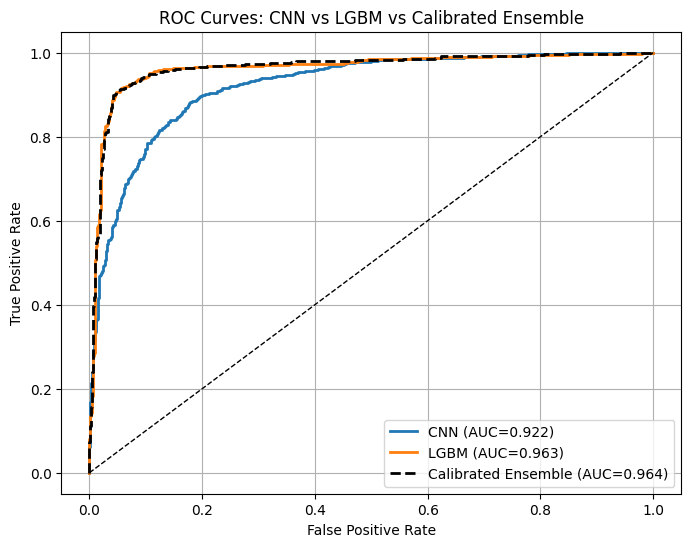

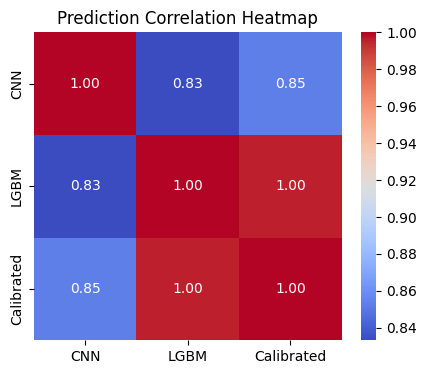

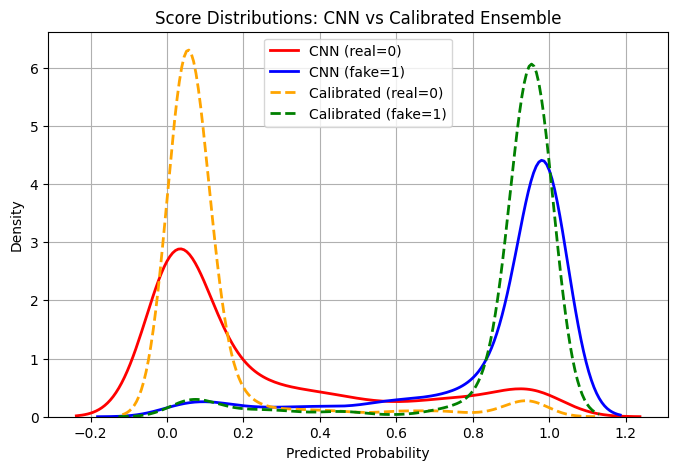

✅ Visualization complete! Alignment verified — metrics now reliable.


In [28]:
# ===== FIXED VISUAL DIAGNOSTICS: CNN vs LGBM vs Calibrated =====
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

WORK = "/content/WORKSPACE"
MODELS = os.path.join(WORK, "models")

# --- Load OOF predictions ---
cnn_df = pd.read_csv(os.path.join(MODELS, "cnn_oof_preds.csv"))
lgb_df = pd.read_csv(os.path.join(MODELS, "lgb_stack_oof.csv"))

# Align based on common image paths
common_paths = sorted(set(cnn_df["image_path"]) & set(lgb_df["image_path"]))
cnn_oof = np.array([cnn_df.loc[cnn_df["image_path"]==p, "cnn_oof"].values[0] for p in common_paths])
lgb_oof = np.array([lgb_df.loc[lgb_df["image_path"]==p, "lgb_stack_oof"].values[0] for p in common_paths])

# Load correct ground-truth labels and align
df_labels = pd.read_csv(os.path.join(WORK, "features", "df_image_table.csv")).set_index("image_path")
y = np.array([
    1 if str(df_labels.loc[p, "json_label"]).lower() == "fake" else 0
    for p in common_paths
])

# --- Sanity checks ---
print(f"Aligned samples: {len(common_paths)}")
print(f"Positive ratio: {y.mean():.3f}")
print(f"Shapes -> CNN: {cnn_oof.shape}, LGBM: {lgb_oof.shape}, y: {y.shape}")

# --- Calibrated logistic regression ensemble ---
stack_X = np.vstack([cnn_oof, lgb_oof]).T
calib = LogisticRegression(max_iter=1000)
calib.fit(stack_X, y)
calib_preds = calib.predict_proba(stack_X)[:, 1]

auc_cnn = roc_auc_score(y, cnn_oof)
auc_lgb = roc_auc_score(y, lgb_oof)
auc_cal = roc_auc_score(y, calib_preds)

print(f"✅ AUCs → CNN: {auc_cnn:.4f} | LGBM: {auc_lgb:.4f} | Calibrated: {auc_cal:.4f}")

# --- ROC curves ---
fpr_cnn, tpr_cnn, _ = roc_curve(y, cnn_oof)
fpr_lgb, tpr_lgb, _ = roc_curve(y, lgb_oof)
fpr_cal, tpr_cal, _ = roc_curve(y, calib_preds)

plt.figure(figsize=(8,6))
plt.plot(fpr_cnn, tpr_cnn, lw=2, label=f"CNN (AUC={auc_cnn:.3f})")
plt.plot(fpr_lgb, tpr_lgb, lw=2, label=f"LGBM (AUC={auc_lgb:.3f})")
plt.plot(fpr_cal, tpr_cal, lw=2, linestyle="--", color="black", label=f"Calibrated Ensemble (AUC={auc_cal:.3f})")
plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: CNN vs LGBM vs Calibrated Ensemble")
plt.legend()
plt.grid(True)
plt.show()

# --- Correlation heatmap ---
df_corr = pd.DataFrame({
    "CNN": cnn_oof,
    "LGBM": lgb_oof,
    "Calibrated": calib_preds
})
plt.figure(figsize=(5,4))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Prediction Correlation Heatmap")
plt.show()

# --- Score distribution plots ---
plt.figure(figsize=(8,5))
sns.kdeplot(cnn_oof[y==0], label="CNN (real=0)", color="red", lw=2)
sns.kdeplot(cnn_oof[y==1], label="CNN (fake=1)", color="blue", lw=2)
sns.kdeplot(calib_preds[y==0], label="Calibrated (real=0)", color="orange", lw=2, linestyle="--")
sns.kdeplot(calib_preds[y==1], label="Calibrated (fake=1)", color="green", lw=2, linestyle="--")
plt.title("Score Distributions: CNN vs Calibrated Ensemble")
plt.xlabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.show()

print("✅ Visualization complete! Alignment verified — metrics now reliable.")
